---
subject: Programmation
venue: OCaml
title: "Exercices"
subtitle: OCaml
short_title: ""
authors:
  - name: OCaml.org
license: CC-BY-4.0
---

*Extraits et traduits automatiquement depuis : [https://ocaml.org/exercises](https://ocaml.org/exercises)*

*Pour toute erreur de traduction (ou autre),* **🚨[ouvrir une issue](https://github.com/davy39/ide/issues/new/choose)🚨**.

:::{note} Difficulté 
 - 🟢 Débutant·e 
 - 🟡 Intermédiaire
 - 🔴 Expert·e
:::

:::{exercise} Queue d'une Liste 🟢
:label: ex1

**Tags:** `list`

Écrire une fonction `last : 'a list -> 'a option` qui retourne le dernier élément d'une liste.

```ocaml
# last ["a" ; "b" ; "c" ; "d"];;
- : string option = Some "d"
# last [];;
- : 'a option = None
```
:::

In [2]:
let rec last (l: 'a list) : 'a = 
    match l with
    |[]-> failwith "Liste vide"
    |[e] -> e
    |_::t -> last t

val last : 'a list -> 'a = <fun>


:::{solution} ex1
:class: dropdown
:label: sol1

```ocaml
# let rec last = function 
  | [] -> None
  | [ x ] -> Some x
  | _ :: t -> last t;;
val last : 'a list -> 'a option = <fun>
```
:::

:::{exercise} Les Deux Derniers Éléments d'une Liste 🟢
:label: ex2

**Tags:** `list`

Trouver les deux derniers éléments (le dernier et l'avant-dernier) d'une liste.

```ocaml
# last_two ["a"; "b"; "c"; "d"];;
- : (string * string) option = Some ("c", "d")
# last_two ["a"];;
- : (string * string) option = None
```
:::

In [ ]:
(* Votre réponse ici *)

:::{solution} ex2
:class: dropdown
:label: sol2

```ocaml
# let rec last_two = function
    | [] | [_] -> None
    | [x; y] -> Some (x,y)
    | _ :: t -> last_two t;;
val last_two : 'a list -> ('a * 'a) option = <fun>
```
:::

:::{exercise} N-ième Élément d'une Liste 🟢
:label: ex3

**Tags:** `list`

Trouver le N-ième élément d'une liste.

```ocaml
# at 2 ["a"; "b"; "c"; "d"; "e"];;
- : string option = Some "c"
# at 2 ["a"];;
- : string option = None
```

**Remarque :** OCaml a `List.nth` qui numérote les éléments à partir de `0` et
lève une exception si l'indice est hors limites.

```ocaml
# List.nth ["a"; "b"; "c"; "d"; "e"] 2;;
- : string = "c"
# List.nth ["a"] 2;;
Exception: Failure "nth".
```
:::

In [ ]:
(* Votre réponse ici *)

:::{solution} ex3
:class: dropdown
:label: sol3

```ocaml
# let rec at k = function
    | [] -> None
    | h :: t -> if k = 0 then Some h else at (k - 1) t;;
val at : int -> 'a list -> 'a option = <fun>
```
:::

:::{exercise} Longueur d'une Liste 🟢
:label: ex4

**Tags:** `list`

Trouver le nombre d'éléments d'une liste.

La bibliothèque standard d'OCaml a `List.length` mais nous vous demandons de la réimplémenter.
Bonus pour une solution [récursive terminale](https://fr.wikipedia.org/wiki/R%C3%A9cursivit%C3%A9_terminale).

```ocaml
# length ["a"; "b"; "c"];;
- : int = 3
# length [];;
- : int = 0
```
:::

In [ ]:
(* Votre réponse ici *)

:::{solution} ex4
:class: dropdown
:label: sol4

```ocaml
# let length list =
    let rec aux n = function
      | [] -> n
      | _ :: t -> aux (n + 1) t
    in
    aux 0 list;;
val length : 'a list -> int = <fun>
```
:::

:::{exercise} Inverser une Liste 🟢
:label: ex5

**Tags:** `list`

Inverser une liste.

La bibliothèque standard d'OCaml a `List.rev` mais nous vous demandons de la réimplémenter.


```ocaml
# rev ["a"; "b"; "c"];;
- : string list = ["c"; "b"; "a"]
```
:::

In [ ]:
(* Votre réponse ici *)

:::{solution} ex5
:class: dropdown
:label: sol5

```ocaml
# let rev list =
    let rec aux acc = function
      | [] -> acc
      | h :: t -> aux (h :: acc) t
    in
    aux [] list;;
val rev : 'a list -> 'a list = <fun>
```
:::

:::{exercise} Palindrome 🟢
:label: ex6

**Tags:** `list`

Déterminer si une liste est un palindrome.

**Indice :** Un palindrome est sa propre inverse.

```ocaml
# is_palindrome ["x"; "a"; "m"; "a"; "x"];;
- : bool = true
# not (is_palindrome ["a"; "b"]);;
- : bool = true
```
:::

In [ ]:
(* Votre réponse ici *)

:::{solution} ex6
:class: dropdown
:label: sol6

```ocaml
# let is_palindrome list =
    (* On peut utiliser soit la fonction rev du problème précédent, soit la fonction intégrée List.rev *)
    list = List.rev list;;
val is_palindrome : 'a list -> bool = <fun>
```
:::

:::{exercise} Aplatir une Liste 🟡
:label: ex7

**Tags:** `list`

Aplatir une structure de liste imbriquée.

```ocaml
type 'a node =
  | One of 'a 
  | Many of 'a node list
```

```ocaml
# flatten [One "a"; Many [One "b"; Many [One "c" ;One "d"]; One "e"]];;
- : string list = ["a"; "b"; "c"; "d"; "e"]
```
:::

In [ ]:
(* Votre réponse ici *)

:::{solution} ex7
:class: dropdown
:label: sol7

```ocaml
# type 'a node =
    | One of 'a 
    | Many of 'a node list;;
type 'a node = One of 'a | Many of 'a node list
# (* Cette fonction parcourt la liste, en ajoutant au début d'un accumulateur tous les éléments rencontrés,
   ce qui aplatit la liste dans l'ordre inverse. Elle peut ensuite être inversée pour obtenir
   la liste aplatie réelle. *);;
# let flatten list =
    let rec aux acc = function
      | [] -> acc
      | One x :: t -> aux (x :: acc) t
      | Many l :: t -> aux (aux acc l) t
    in
    List.rev (aux [] list);;
val flatten : 'a node list -> 'a list = <fun>
```
:::

:::{exercise} Éliminer les Doublons 🟡
:label: ex8

**Tags:** `list`

Éliminer les doublons consécutifs des éléments d'une liste.

```ocaml
# compress ["a"; "a"; "a"; "a"; "b"; "c"; "c"; "a"; "a"; "d"; "e"; "e"; "e"; "e"];;
- : string list = ["a"; "b"; "c"; "a"; "d"; "e"]
```
:::

In [ ]:
(* Votre réponse ici *)

:::{solution} ex8
:class: dropdown
:label: sol8

```ocaml
# let rec compress = function
    | a :: (b :: _ as t) -> if a = b then compress t else a :: compress t
    | smaller -> smaller;;
val compress : 'a list -> 'a list = <fun>
```
:::

:::{exercise} Regrouper les Doublons Consécutifs 🟡
:label: ex9

**Tags:** `list`

Regrouper les doublons consécutifs des éléments d'une liste en sous-listes.

```ocaml
# pack ["a"; "a"; "a"; "a"; "b"; "c"; "c"; "a"; "a"; "d"; "d"; "e"; "e"; "e"; "e"];;
- : string list list =
[["a"; "a"; "a"; "a"]; ["b"]; ["c"; "c"]; ["a"; "a"]; ["d"; "d"];
 ["e"; "e"; "e"; "e"]]
```
:::

In [ ]:
(* Votre réponse ici *)

:::{solution} ex9
:class: dropdown
:label: sol9

```ocaml
# let pack list =
    let rec aux current acc = function
      | [] -> []    (* Ne peut être atteint que si la liste originale est vide *)
      | [x] -> (x :: current) :: acc
      | a :: (b :: _ as t) ->
         if a = b then aux (a :: current) acc t
         else aux [] ((a :: current) :: acc) t  in
    List.rev (aux [] [] list);;
val pack : 'a list -> 'a list list = <fun>
```
:::

:::{exercise} Encodage par Plages (Run-Length Encoding) 🟢
:label: ex10

**Tags:** `list`

Si besoin, rafraîchissez votre mémoire sur l'[encodage par plages](https://fr.wikipedia.org/wiki/Codage_par_plages).

Voici un exemple :

```ocaml
# encode ["a"; "a"; "a"; "a"; "b"; "c"; "c"; "a"; "a"; "d"; "e"; "e"; "e"; "e"];;
- : (int * string) list =
[(4, "a"); (1, "b"); (2, "c"); (2, "a"); (1, "d"); (4, "e")]
```
:::

In [ ]:
(* Votre réponse ici *)

:::{solution} ex10
:class: dropdown
:label: sol10

```ocaml
# let encode list =
    let rec aux count acc = function
      | [] -> [] (* Ne peut être atteint que si la liste originale est vide *)
      | [x] -> (count + 1, x) :: acc
      | a :: (b :: _ as t) -> if a = b then aux (count + 1) acc t
                              else aux 0 ((count + 1, a) :: acc) t in
    List.rev (aux 0 [] list);;
val encode : 'a list -> (int * 'a) list = <fun>
```
:::

:::{exercise} Encodage par Plages Modifié 🟢
:label: ex11

**Tags:** `list`

Modifiez le résultat du problème précédent de telle manière que si un
élément n'a pas de doublons, il est simplement copié dans la liste de résultat. Seuls
les éléments avec des doublons sont transférés sous forme de listes (N E).

Puisque les listes OCaml sont homogènes, il faut définir un type pour contenir
à la fois les éléments uniques et les sous-listes.

<!-- $MDX skip -->
```ocaml
type 'a rle =
  | One of 'a
  | Many of int * 'a
```

```ocaml
# encode ["a"; "a"; "a"; "a"; "b"; "c"; "c"; "a"; "a"; "d"; "e"; "e"; "e"; "e"];;
- : string rle list =
[Many (4, "a"); One "b"; Many (2, "c"); Many (2, "a"); One "d";
 Many (4, "e")]
```
:::

In [ ]:
(* Votre réponse ici *)

:::{solution} ex11
:class: dropdown
:label: sol11

```ocaml
# type 'a rle =
  | One of 'a
  | Many of int * 'a;;
type 'a rle = One of 'a | Many of int * 'a
# let encode l =
    let create_tuple cnt elem =
      if cnt = 1 then One elem
      else Many (cnt, elem) in
    let rec aux count acc = function
      | [] -> []
      | [x] -> (create_tuple (count + 1) x) :: acc
      | hd :: (snd :: _ as tl) ->
          if hd = snd then aux (count + 1) acc tl
          else aux 0 ((create_tuple (count + 1) hd) :: acc) tl in
      List.rev (aux 0 [] l);;
val encode : 'a list -> 'a rle list = <fun>
```
:::

:::{exercise} Décoder une Liste Encodée par Plages 🟡
:label: ex12

**Tags:** `list`

Étant donné une liste encodée par plages générée comme spécifié dans le problème
précédent, construisez sa version non compressée.

```ocaml
#  decode [Many (4, "a"); One "b"; Many (2, "c"); Many (2, "a"); One "d"; Many (4, "e")];;
- : string list =
["a"; "a"; "a"; "a"; "b"; "c"; "c"; "a"; "a"; "d"; "e"; "e"; "e"; "e"]
```
:::

In [ ]:
(* Votre réponse ici *)

:::{solution} ex12
:class: dropdown
:label: sol12

```ocaml
# let decode list =
    let rec many acc n x =
      if n = 0 then acc else many (x :: acc) (n - 1) x
    in
    let rec aux acc = function
      | [] -> acc
      | One x :: t -> aux (x :: acc) t
      | Many (n, x) :: t -> aux (many acc n x) t
    in
      aux [] (List.rev list);;
val decode : 'a rle list -> 'a list = <fun>
```
:::

:::{exercise} Encodage par Plages d'une Liste (Solution Directe) 🟡
:label: ex13

**Tags:** `list`

Implémentez la méthode de compression de données par encodage par plages
directement. C'est-à-dire, ne créez pas explicitement les sous-listes contenant les
doublons, comme dans le problème "[Regrouper les doublons consécutifs des éléments d'une liste en sous-listes](#9)", mais comptez-les seulement. Comme dans le problème
"[Encodage par plages modifié](#10)", simplifiez la liste de résultat en remplaçant les listes singletons (1 X) par X.

```ocaml
# encode ["a";"a";"a";"a";"b";"c";"c";"a";"a";"d";"e";"e";"e";"e"];;
- : string rle list =
[Many (4, "a"); One "b"; Many (2, "c"); Many (2, "a"); One "d";
 Many (4, "e")]
```
:::

In [ ]:
(* Votre réponse ici *)

:::{solution} ex13
:class: dropdown
:label: sol13

```ocaml
# let encode list =
    let rle count x = if count = 0 then One x else Many (count + 1, x) in
    let rec aux count acc = function
      | [] -> [] (* Ne peut être atteint que si la liste originale est vide *)
      | [x] -> rle count x :: acc
      | a :: (b :: _ as t) -> if a = b then aux (count + 1) acc t
                              else aux 0 (rle count a :: acc) t
    in
      List.rev (aux 0 [] list);;
val encode : 'a list -> 'a rle list = <fun>
```
:::

:::{exercise} Dupliquer les Éléments d'une Liste 🟢
:label: ex14

**Tags:** `list`

Dupliquer les éléments d'une liste.

```ocaml
# duplicate ["a"; "b"; "c"; "c"; "d"];;
- : string list = ["a"; "a"; "b"; "b"; "c"; "c"; "c"; "c"; "d"; "d"]
```
:::

In [ ]:
(* Votre réponse ici *)

:::{solution} ex14
:class: dropdown
:label: sol14

```ocaml
# let rec duplicate = function
    | [] -> []
    | h :: t -> h :: h :: duplicate t;;
val duplicate : 'a list -> 'a list = <fun>
```
:::

:::{exercise} Répliquer les Éléments d'une Liste un Nombre de Fois Donné 🟡
:label: ex15

**Tags:** `list`

Répliquer les éléments d'une liste un nombre de fois donné.

```ocaml
# replicate ["a"; "b"; "c"] 3;;
- : string list = ["a"; "a"; "a"; "b"; "b"; "b"; "c"; "c"; "c"]
```
:::

In [ ]:
(* Votre réponse ici *)

:::{solution} ex15
:class: dropdown
:label: sol15

```ocaml
# let replicate list n =
    let rec prepend n acc x =
      if n = 0 then acc else prepend (n-1) (x :: acc) x in
    let rec aux acc = function
      | [] -> acc
      | h :: t -> aux (prepend n acc h) t in
    (* Ceci pourrait aussi être écrit comme :
       List.fold_left (prepend n) [] (List.rev list) *)
    aux [] (List.rev list);;
val replicate : 'a list -> int -> 'a list = <fun>
```
:::

:::{exercise} Supprimer Chaque N-ième Élément d'une Liste 🟡
:label: ex16

**Tags:** `list`

Supprimer chaque N-ième élément d'une liste.

```ocaml
# drop ["a"; "b"; "c"; "d"; "e"; "f"; "g"; "h"; "i"; "j"] 3;;
- : string list = ["a"; "b"; "d"; "e"; "g"; "h"; "j"]
```
:::

In [ ]:
(* Votre réponse ici *)

:::{solution} ex16
:class: dropdown
:label: sol16

```ocaml
# let drop list n =
    let rec aux i = function
      | [] -> []
      | h :: t -> if i = n then aux 1 t else h :: aux (i + 1) t  in
    aux 1 list;;
val drop : 'a list -> int -> 'a list = <fun>
```
:::

:::{exercise} Diviser une Liste en Deux Parties ; la Longueur de la Première Partie est Donnée 🟢
:label: ex17

**Tags:** `list`

Diviser une liste en deux parties ; la longueur de la première partie est donnée.

Si la longueur de la première partie est plus longue que la liste entière, alors la
première partie est la liste et la seconde partie est vide.

```ocaml
# split ["a"; "b"; "c"; "d"; "e"; "f"; "g"; "h"; "i"; "j"] 3;;
- : string list * string list =
(["a"; "b"; "c"], ["d"; "e"; "f"; "g"; "h"; "i"; "j"])
# split ["a"; "b"; "c"; "d"] 5;;
- : string list * string list = (["a"; "b"; "c"; "d"], [])
```
:::

In [ ]:
(* Votre réponse ici *)

:::{solution} ex17
:class: dropdown
:label: sol17

```ocaml
# let split list n =
    let rec aux i acc = function
      | [] -> List.rev acc, []
      | h :: t as l -> if i = 0 then List.rev acc, l
                       else aux (i - 1) (h :: acc) t 
    in
      aux n [] list;;
val split : 'a list -> int -> 'a list * 'a list = <fun>
```
:::

:::{exercise} Extraire une Tranche d'une Liste 🟡
:label: ex18

**Tags:** `list`

Étant donné deux indices, `i` et `k`, la tranche est la liste contenant les
éléments entre le `i`-ème et le `k`-ème élément de la liste originale
(les deux limites incluses). Commencez à compter les éléments à partir de 0 (c'est la
façon dont le module `List` numérote les éléments).

```ocaml
# slice ["a"; "b"; "c"; "d"; "e"; "f"; "g"; "h"; "i"; "j"] 2 6;;
- : string list = ["c"; "d"; "e"; "f"; "g"]
```
:::

In [ ]:
(* Votre réponse ici *)

:::{solution} ex18
:class: dropdown
:label: sol18

```ocaml
# let slice list i k =
    let rec take n = function
      | [] -> []
      | h :: t -> if n = 0 then [] else h :: take (n - 1) t
    in
    let rec drop n = function
      | [] -> []
      | h :: t as l -> if n = 0 then l else drop (n - 1) t
    in
    take (k - i + 1) (drop i list);;
val slice : 'a list -> int -> int -> 'a list = <fun>
```
:::

:::{exercise} Faire une Rotation d'une Liste de N Places vers la Gauche 🟡
:label: ex19

**Tags:** `list`

Faire une rotation d'une liste de N places vers la gauche.

```ocaml
# rotate ["a"; "b"; "c"; "d"; "e"; "f"; "g"; "h"] 3;;
- : string list = ["d"; "e"; "f"; "g"; "h"; "a"; "b"; "c"]
```
:::

In [ ]:
(* Votre réponse ici *)

:::{solution} ex19
:class: dropdown
:label: sol19

```ocaml
# let split list n =
    let rec aux i acc = function
      | [] -> List.rev acc, []
      | h :: t as l -> if i = 0 then List.rev acc, l
                       else aux (i - 1) (h :: acc) t  in
    aux n [] list

  let rotate list n =
    let len = List.length list in
    (* Calculer une valeur de rotation entre 0 et len - 1 *)
    let n = if len = 0 then 0 else (n mod len + len) mod len in
    if n = 0 then list
    else let a, b = split list n in b @ a;;
val split : 'a list -> int -> 'a list * 'a list = <fun>
val rotate : 'a list -> int -> 'a list = <fun>
```
:::

:::{exercise} Supprimer le K-ième Élément d'une Liste 🟢
:label: ex20

**Tags:** `list`

Supprimer le K-ième élément d'une liste.

Le premier élément de la liste est numéroté 0, le deuxième 1,...

```ocaml
# remove_at 1 ["a"; "b"; "c"; "d"];;
- : string list = ["a"; "c"; "d"]
```
:::

In [ ]:
(* Votre réponse ici *)

:::{solution} ex20
:class: dropdown
:label: sol20

```ocaml
# let rec remove_at n = function
    | [] -> []
    | h :: t -> if n = 0 then t else h :: remove_at (n - 1) t;;
val remove_at : int -> 'a list -> 'a list = <fun>
```
:::

:::{exercise} Insérer un Élément à une Position Donnée dans une Liste 🟢
:label: ex21

**Tags:** `list`

Commencez à compter les éléments de la liste à partir de 0. Si la position est plus grande ou
égale à la longueur de la liste, insérez l'élément à la fin. (Le
comportement n'est pas spécifié si la position est négative.)

```ocaml
# insert_at "alfa" 1 ["a"; "b"; "c"; "d"];;
- : string list = ["a"; "alfa"; "b"; "c"; "d"]
```
:::

In [ ]:
(* Votre réponse ici *)

:::{solution} ex21
:class: dropdown
:label: sol21

```ocaml
# let rec insert_at x n = function
    | [] -> [x]
    | h :: t as l -> if n = 0 then x :: l else h :: insert_at x (n - 1) t;;
val insert_at : 'a -> int -> 'a list -> 'a list = <fun>
```
:::

:::{exercise} Créer une Liste Contenant Tous les Entiers dans un Intervalle Donné 🟢
:label: ex22

**Tags:** `list`

Si le premier argument est plus grand que le second, produire une liste dans l'ordre
décroissant.

```ocaml
# range 4 9;;
- : int list = [4; 5; 6; 7; 8; 9]
```
:::

In [ ]:
(* Votre réponse ici *)

:::{solution} ex22
:class: dropdown
:label: sol22

```ocaml
# let range a b =
    let rec aux a b =
      if a > b then [] else a :: aux (a + 1) b
    in
      if a > b then List.rev (aux b a) else aux a b;;
val range : int -> int -> int list = <fun>
```
:::

:::{exercise} Extraire un Nombre Donné d'Éléments Sélectionnés Aléatoirement d'une Liste 🟡
:label: ex23

**Tags:** `list`

Les éléments sélectionnés doivent être retournés dans une liste. Nous utilisons le module `Random`
et l'initialisons avec `Random.init 0` au début de 
la fonction pour la reproductibilité et pour valider la solution. Pour rendre la fonction vraiment aléatoire, cependant,
il faudrait supprimer l'appel à `Random.init 0`

```ocaml
# rand_select ["a"; "b"; "c"; "d"; "e"; "f"; "g"; "h"] 3;;
- : string list = ["e"; "c"; "g"]
```
:::

In [ ]:
(* Votre réponse ici *)

:::{solution} ex23
:class: dropdown
:label: sol23

```ocaml
# let rand_select list n =
    Random.init 0;
    let rec extract acc n = function
      | [] -> raise Not_found
      | h :: t -> if n = 0 then (h, acc @ t) else extract (h :: acc) (n - 1) t
    in
    let extract_rand list len =
      extract [] (Random.int len) list
    in
    let rec aux n acc list len =
      if n = 0 then acc else
        let picked, rest = extract_rand list len in
        aux (n - 1) (picked :: acc) rest (len - 1)
    in
    let len = List.length list in
      aux (min n len) [] list len;;
val rand_select : 'a list -> int -> 'a list = <fun>
```
:::

:::{exercise} Loto : Tirer N Nombres Aléatoires Différents de l'Ensemble 1..M 🟢
:label: ex24

**Tags:** `list`

Tirer N nombres aléatoires différents de l'ensemble `1..M`.

Les nombres sélectionnés doivent être retournés dans une liste.

```ocaml
# lotto_select 6 49;;
- : int list = [20; 28; 45; 16; 24; 38]
```
:::

In [ ]:
(* Votre réponse ici *)

:::{solution} ex24
:class: dropdown
:label: sol24

```ocaml
# (* [range] et [rand_select] sont définis dans les problèmes ci-dessus *)
  let lotto_select n m = rand_select (range 1 m) n;;
val lotto_select : int -> int -> int list = <fun>
```
:::

:::{exercise} Générer une Permutation Aléatoire des Éléments d'une Liste 🟢
:label: ex25

**Tags:** `list`

Générer une permutation aléatoire des éléments d'une liste.

```ocaml
# permutation ["a"; "b"; "c"; "d"; "e"; "f"];;
- : string list = ["c"; "d"; "f"; "e"; "b"; "a"]
```
:::

In [ ]:
(* Votre réponse ici *)

:::{solution} ex25
:class: dropdown
:label: sol25

```ocaml
# let permutation list =
    let rec extract acc n = function
      | [] -> raise Not_found
      | h :: t -> if n = 0 then (h, acc @ t) else extract (h :: acc) (n - 1) t
    in
    let extract_rand list len =
      extract [] (Random.int len) list
    in
    let rec aux acc list len =
      if len = 0 then acc else
        let picked, rest = extract_rand list len in
        aux (picked :: acc) rest (len - 1)
    in
    aux [] list (List.length list);;
val permutation : 'a list -> 'a list = <fun>
```
:::

:::{exercise} Générer les Combinaisons de K Objets Distincts Choisis Parmi les N Éléments d'une Liste 🟡
:label: ex26

**Tags:** `list`

Générer les combinaisons de K objets distincts choisis parmi les N éléments d'une liste.

De combien de manières peut-on choisir un comité de 3 personnes dans un groupe de 12
personnes ? Nous savons tous qu'il y a C(12,3) = 220 possibilités (C(N,K)
dénote les coefficients binomiaux bien connus). Pour les mathématiciens purs,
ce résultat peut être formidable. Mais nous voulons vraiment générer toutes les
possibilités dans une liste.

```ocaml
# extract 2 ["a"; "b"; "c"; "d"];;
- : string list list =
[["a"; "b"]; ["a"; "c"]; ["a"; "d"]; ["b"; "c"]; ["b"; "d"]; ["c"; "d"]]
```
:::

In [ ]:
(* Votre réponse ici *)

:::{solution} ex26
:class: dropdown
:label: sol26

```ocaml
# let rec extract k list =
    if k <= 0 then [[]]
    else match list with
         | [] -> []
         | h :: tl ->
            let with_h = List.map (fun l -> h :: l) (extract (k - 1) tl) in
            let without_h = extract k tl in
            with_h @ without_h;;
val extract : int -> 'a list -> 'a list list = <fun>
```
:::

:::{exercise} Grouper les Éléments d'un Ensemble en Sous-ensembles Disjoints 🟡
:label: ex27

**Tags:** `list`

Grouper les éléments d'un ensemble en sous-ensembles disjoints

1. De combien de manières un groupe de 9 personnes peut-il travailler en 3 sous-groupes disjoints
de 2, 3 et 4 personnes ? Écrivez une fonction qui génère toutes les
possibilités et les retourne dans une liste.
2. Généralisez la fonction ci-dessus de manière à ce que l'on puisse spécifier une liste de
tailles de groupe et que la fonction retourne une liste de groupes.

```ocaml
# group ["a"; "b"; "c"; "d"] [2; 1];;
- : string list list list =
[[["a"; "b"]; ["c"]]; [["a"; "c"]; ["b"]]; [["b"; "c"]; ["a"]];
 [["a"; "b"]; ["d"]]; [["a"; "c"]; ["d"]]; [["b"; "c"]; ["d"]];
 [["a"; "d"]; ["b"]]; [["b"; "d"]; ["a"]]; [["a"; "d"]; ["c"]];
 [["b"; "d"]; ["c"]]; [["c"; "d"]; ["a"]]; [["c"; "d"]; ["b"]]]
```
:::

In [ ]:
(* Votre réponse ici *)

:::{solution} ex27
:class: dropdown
:label: sol27

```ocaml
# (* Cette implémentation est moins optimisée que la version avec une seule extraction
  , car plus de travail est fait sur les listes après chaque
  transformation pour ajouter les éléments réels. Le résultat final est plus propre
  en termes de code, cependant. *)

  let group list sizes =
    let initial = List.map (fun size -> size, []) sizes in
    (* Le cœur de la fonction. Prepend accepte une liste de groupes,
        chacun avec le nombre d'éléments qui doivent être ajoutés, et
        ajoute l'élément à chaque groupe qui peut le supporter, transformant ainsi
        [1,a ; 2,b ; 0,c] en [ [0,x::a ; 2,b ; 0,c ];
        [1,a ; 1,x::b ; 0,c]; [ 1,a ; 2,b ; 0,c ]]

        Encore une fois, dans le langage Prolog (pour lequel ces questions sont
        initialement prévues), cette fonction est beaucoup plus simple.  *)
  let prepend p list =
    let emit l acc = l :: acc in
    let rec aux emit acc = function
      | [] -> emit [] acc
      | (n, l) as h :: t ->
         let acc = if n > 0 then emit ((n - 1, p :: l) :: t) acc
                   else acc in
         aux (fun l acc -> emit (h :: l) acc) acc t
    in
    aux emit [] list
  in
  let rec aux = function
    | [] -> [initial]
    | h :: t -> List.concat_map (prepend h) (aux t)
  in
  let all = aux list in
  (* N'oubliez pas d'éliminer tous les ensembles de groupes qui ont des groupes
     non complets *)
  let complete = List.filter (List.for_all (fun (x, _) -> x = 0)) all in
    List.map (List.map snd) complete;;
val group : 'a list -> int list -> 'a list list list = <fun>
```
:::

:::{exercise} Trier une Liste de Listes selon la Longueur des Sous-listes 🟡
:label: ex28

**Tags:** `list`

Trier une liste de listes selon la longueur des sous-listes.

1. Nous supposons qu'une liste contient des éléments qui sont eux-mêmes des listes.
L'objectif est de trier les éléments de cette liste en fonction de leur
longueur. Par exemple, les listes courtes d'abord, les listes plus longues ensuite, ou vice versa.

2. Encore une fois, nous supposons qu'une liste contient des éléments qui sont eux-mêmes des listes.
Mais cette fois, l'objectif est de trier les éléments de cette
liste en fonction de leur **fréquence de longueur** ; c'est-à-dire, par défaut,
où le tri est croissant, les listes avec des longueurs rares sont placées
en premier, les autres avec une longueur plus fréquente viennent après.

```ocaml
# length_sort [["a"; "b"; "c"]; ["d"; "e"]; ["f"; "g"; "h"]; ["d"; "e"];
             ["i"; "j"; "k"; "l"]; ["m"; "n"]; ["o"]];;
- : string list list =
[["o"]; ["d"; "e"]; ["d"; "e"]; ["m"; "n"]; ["a"; "b"; "c"]; ["f"; "g"; "h"];
 ["i"; "j"; "k"; "l"]]
# frequency_sort [["a"; "b"; "c"]; ["d"; "e"]; ["f"; "g"; "h"]; ["d"; "e"];
                ["i"; "j"; "k"; "l"]; ["m"; "n"]; ["o"]];;
- : string list list =
[["i"; "j"; "k"; "l"]; ["o"]; ["a"; "b"; "c"]; ["f"; "g"; "h"]; ["d"; "e"];
 ["d"; "e"]; ["m"; "n"]]
```
:::

In [ ]:
(* Votre réponse ici *)

:::{solution} ex28
:class: dropdown
:label: sol28

```ocaml
(* Il se peut que nous ne soyons pas autorisés à utiliser la fonction intégrée List.sort, voici donc une
   implémentation en huit lignes du tri par insertion — complexité temporelle O(n²). *)
let rec insert cmp e = function
  | [] -> [e]
  | h :: t as l -> if cmp e h <= 0 then e :: l else h :: insert cmp e t

let rec sort cmp = function
  | [] -> []
  | h :: t -> insert cmp h (sort cmp t)

(* Tri selon la longueur : ajouter la longueur en préfixe, trier, supprimer la longueur *)
let length_sort lists =
  let lists = List.map (fun list -> List.length list, list) lists in
  let lists = sort (fun a b -> compare (fst a) (fst b)) lists in
  List.map snd lists
;;

(* Tri selon la fréquence de longueur : ajouter la fréquence en préfixe, trier,
   supprimer la fréquence. Les fréquences sont extraites en triant les longueurs
   et en appliquant le RLE pour compter les occurrences de chaque longueur (voir le problème
   "Encodage par plages d'une liste.") *)
let rle list =
  let rec aux count acc = function
    | [] -> [] (* Ne peut être atteint que si la liste originale est vide *)
    | [x] -> (x, count + 1) :: acc
    | a :: (b :: _ as t) ->
       if a = b then aux (count + 1) acc t
       else aux 0 ((a, count + 1) :: acc) t in
  aux 0 [] list

let frequency_sort lists =
  let lengths = List.map List.length lists in
  let freq = rle (sort compare lengths) in
  let by_freq =
    List.map (fun list -> List.assoc (List.length list) freq , list) lists in
  let sorted = sort (fun a b -> compare (fst a) (fst b)) by_freq in
  List.map snd sorted
```
:::

:::{exercise} Déterminer si un Nombre Entier Donné est Premier 🟡
:label: ex29

**Tags:** `arithmetic`

Déterminer si un nombre entier donné est premier.

```ocaml
# not (is_prime 1);;
- : bool = true
# is_prime 7;;
- : bool = true
# not (is_prime 12);;
- : bool = true
```
:::

In [ ]:
(* Votre réponse ici *)

:::{solution} ex29
:class: dropdown
:label: sol29

```ocaml
# let is_prime n =
    let n = abs n in
    let rec is_not_divisor d =
      d * d > n || (n mod d <> 0 && is_not_divisor (d + 1)) in
    n > 1 && is_not_divisor 2;;
val is_prime : int -> bool = <fun>
```
:::

:::{exercise} Déterminer le Plus Grand Commun Diviseur de Deux Nombres Entiers Positifs 🟡
:label: ex30

**Tags:** `arithmetic`

Déterminer le plus grand commun diviseur de deux nombres entiers positifs.

Utilisez l'algorithme d'Euclide.

```ocaml
# gcd 13 27;;
- : int = 1
# gcd 20536 7826;;
- : int = 2
```
:::

In [ ]:
(* Votre réponse ici *)

:::{solution} ex30
:class: dropdown
:label: sol30

```ocaml
# let rec gcd a b =
    if b = 0 then a else gcd b (a mod b);;
val gcd : int -> int -> int = <fun>
```
:::

:::{exercise} Déterminer si Deux Nombres Entiers Positifs sont Premiers Entre Eux 🟢
:label: ex31

**Tags:** `arithmetic`

Déterminer si deux nombres entiers positifs sont premiers entre eux.

Deux nombres sont premiers entre eux si leur plus grand commun diviseur est égal à 1.

```ocaml
# coprime 13 27;;
- : bool = true
# not (coprime 20536 7826);;
- : bool = true
```
:::

In [ ]:
(* Votre réponse ici *)

:::{solution} ex31
:class: dropdown
:label: sol31

```ocaml
# (* [gcd] est défini dans la question précédente *)
  let coprime a b = gcd a b = 1;;
val coprime : int -> int -> bool = <fun>
```
:::

:::{exercise} Calculer l'Indicatrice d'Euler Φ(m) 🟡
:label: ex32

**Tags:** `arithmetic`

L'indicatrice d'Euler, aussi appelée fonction totient φ(m), est définie comme le nombre d'entiers
positifs r (1 ≤ r < m) qui sont premiers avec m. On pose φ(1) = 1.

Trouvez la valeur de φ(m) si m est un nombre premier. L'indicatrice
d'Euler joue un rôle important dans l'une des méthodes de cryptographie à clé
publique les plus utilisées (RSA). Dans cet exercice, vous devez utiliser
la méthode la plus primitive pour calculer cette fonction (il existe des
façons plus intelligentes que nous aborderons plus tard).

```ocaml
# phi 10;;
- : int = 4
```
:::

In [ ]:
(* Votre réponse ici *)

:::{solution} ex32
:class: dropdown
:label: sol32

```ocaml
# (* [coprime] est défini dans la question précédente *)
  let phi n =
    let rec count_coprime acc d =
      if d < n then
        count_coprime (if coprime n d then acc + 1 else acc) (d + 1)
      else acc
    in
      if n = 1 then 1 else count_coprime 0 1;;
val phi : int -> int = <fun>
```
:::

:::{exercise} Déterminer les Facteurs Premiers d'un Entier Positif Donné 🟡
:label: ex33

**Tags:** `arithmetic`

Construire une liste plate contenant les facteurs premiers par ordre croissant.


```ocaml
# factors 315;;
- : int list = [3; 3; 5; 7]
```
:::

In [ ]:
(* Votre réponse ici *)

:::{solution} ex33
:class: dropdown
:label: sol33

```ocaml
# (* Rappelons que d divise n si et seulement si [n mod d = 0] *)
  let factors n =
    let rec aux d n =
      if n = 1 then [] else
        if n mod d = 0 then d :: aux d (n / d) else aux (d + 1) n
    in
      aux 2 n;;
val factors : int -> int list = <fun>
```
:::

:::{exercise} Déterminer les Facteurs Premiers d'un Entier Positif Donné (2) 🟡
:label: ex34

**Tags:** `arithmetic`

Construire une liste contenant les facteurs premiers et leur multiplicité.

**Indice :** Le problème est similaire au problème
[Encodage par plages d'une liste (solution directe)](#10).

```ocaml
# factors 315;;
- : (int * int) list = [(3, 2); (5, 1); (7, 1)]
```
:::

In [ ]:
(* Votre réponse ici *)

:::{solution} ex34
:class: dropdown
:label: sol34

```ocaml
# let factors n =
    let rec aux d n =
      if n = 1 then [] else
        if n mod d = 0 then
          match aux d (n / d) with
          | (h, n) :: t when h = d -> (h, n + 1) :: t
          | l -> (d, 1) :: l
        else aux (d + 1) n
    in
      aux 2 n;;
val factors : int -> (int * int) list = <fun>
```
:::

:::{exercise} Calculer l'Indicatrice d'Euler Φ(m) (Amélioré) 🟡
:label: ex35

**Tags:** `arithmetic`

Voir le problème "[Calculer l'indicatrice d'Euler φ(m)](#34)" pour
la définition de l'indicatrice d'Euler. Si la liste des facteurs
premiers d'un nombre m est connue sous la forme du problème précédent, alors
la fonction phi(m) peut être calculée efficacement comme suit : Soit
`[(p1, m1); (p2, m2); (p3, m3); ...]` la liste des facteurs premiers
(et leurs multiplicités) d'un nombre m donné. Alors φ(m) peut être
calculé avec la formule suivante :

φ(m) = (p1 - 1) × p1<sup>m1 - 1</sup> × (p2 - 1) ×
p2<sup>m2 - 1</sup> × (p3 - 1) × p3<sup>m3 - 1</sup> × ⋯

```ocaml
# phi_improved 10;;
- : int = 4
# phi_improved 13;;
- : int = 12
```
:::

In [ ]:
(* Votre réponse ici *)

:::{solution} ex35
:class: dropdown
:label: sol35

```ocaml
(* Fonction puissance naïve. *)
let rec pow n p = if p < 1 then 1 else n * pow n (p - 1)

(* [factors] est défini dans la question précédente. *)
let phi_improved n =
  let rec aux acc = function
    | [] -> acc
    | (p, m) :: t -> aux ((p - 1) * pow p (m - 1) * acc) t
  in
    aux 1 (factors n)
```
:::

:::{exercise} Comparer les Deux Méthodes de Calcul de l'Indicatrice d'Euler 🟢
:label: ex36

**Tags:** `arithmetic`

Utilisez les solutions des problèmes 
"[Calculer l'indicatrice d'Euler φ(m)](#34)" et
"[Calculer l'indicatrice d'Euler φ(m) (amélioré)](#37)"
pour comparer les algorithmes. Prenez le nombre d'inférences logiques comme mesure d'efficacité. Essayez de calculer φ(10090) comme exemple.

```ocaml
timeit phi 10090
```
:::

In [ ]:
(* Votre réponse ici *)

:::{solution} ex36
:class: dropdown
:label: sol36

```ocaml
# (* Fonction [timeit] naïve. Elle nécessite le chargement du module [Unix]. *)
  let timeit f a =
    let t0 = Unix.gettimeofday() in
      ignore (f a);
    let t1 = Unix.gettimeofday() in
      t1 -. t0;;
val timeit : ('a -> 'b) -> 'a -> float = <fun>
```
:::

:::{exercise} Une Liste de Nombres Premiers 🟢
:label: ex37

**Tags:** `arithmetic`

Étant donné un intervalle d'entiers par sa limite inférieure et supérieure, construire une liste
de tous les nombres premiers dans cet intervalle.

```ocaml
# List.length (all_primes 2 7920);;
- : int = 1000
```
:::

In [ ]:
(* Votre réponse ici *)

:::{solution} ex37
:class: dropdown
:label: sol37

```ocaml
# let is_prime n =
    let n = max n (-n) in
    let rec is_not_divisor d =
      d * d > n || (n mod d <> 0 && is_not_divisor (d + 1))
    in
      is_not_divisor 2

  let rec all_primes a b =
    if a > b then [] else
      let rest = all_primes (a + 1) b in
      if is_prime a then a :: rest else rest;;
val is_prime : int -> bool = <fun>
val all_primes : int -> int -> int list = <fun>
```
:::

:::{exercise} Conjecture de Goldbach 🟡
:label: ex38

**Tags:** `arithmetic`

La conjecture de Goldbach dit que tout nombre pair positif supérieur à
2 est la somme de deux nombres premiers. Exemple : 28 = 5 + 23. C'est l'un
des faits les plus célèbres de la théorie des nombres qui n'a pas été prouvé
correct dans le cas général. Il a été *confirmé numériquement* jusqu'à de
très grands nombres. Écrivez une fonction pour trouver les deux nombres premiers qui
s'additionnent pour donner un entier pair donné.

```ocaml
# goldbach 28;;
- : int * int = (5, 23)
```
:::

In [ ]:
(* Votre réponse ici *)

:::{solution} ex38
:class: dropdown
:label: sol38

```ocaml
# (* [is_prime] est défini dans la solution précédente *)
  let goldbach n =
    let rec aux d =
      if is_prime d && is_prime (n - d) then (d, n - d)
      else aux (d + 1)
    in
      aux 2;;
val goldbach : int -> int * int = <fun>
```
:::

:::{exercise} Une Liste de Compositions de Goldbach 🟡
:label: ex39

**Tags:** `arithmetic`

Étant donné un intervalle d'entiers par sa limite inférieure et supérieure, imprimer une liste
de tous les nombres pairs et leur composition de Goldbach.

Dans la plupart des cas, si un nombre pair est écrit comme la somme de deux nombres
premiers, l'un d'eux est très petit. Très rarement, les nombres premiers sont tous les deux
plus grands que, disons, 50. Essayez de trouver combien de cas de ce type il y a dans
l'intervalle 2..3000.

```ocaml
# goldbach_list 9 20;;
- : (int * (int * int)) list =
[(10, (3, 7)); (12, (5, 7)); (14, (3, 11)); (16, (3, 13)); (18, (5, 13));
 (20, (3, 17))]
```
:::

In [ ]:
(* Votre réponse ici *)

:::{solution} ex39
:class: dropdown
:label: sol39

```ocaml
# (* [goldbach] est défini dans la question précédente. *)
  let rec goldbach_list a b =
    if a > b then [] else
      if a mod 2 = 1 then goldbach_list (a + 1) b
      else (a, goldbach a) :: goldbach_list (a + 2) b

  let goldbach_limit a b lim =
    List.filter (fun (_, (a, b)) -> a > lim && b > lim) (goldbach_list a b);;
val goldbach_list : int -> int -> (int * (int * int)) list = <fun>
val goldbach_limit : int -> int -> int -> (int * (int * int)) list = <fun>
```
:::

:::{exercise} Tables de Vérité pour les Expressions Logiques (2 Variables) 🟡
:label: ex40

**Tags:** `logic`

Définissons un petit "langage" pour les expressions booléennes contenant
des variables :

```ocaml
# type bool_expr =
  | Var of string
  | Not of bool_expr
  | And of bool_expr * bool_expr
  | Or of bool_expr * bool_expr;;
type bool_expr =
    Var of string
  | Not of bool_expr
  | And of bool_expr * bool_expr
  | Or of bool_expr * bool_expr
```

Une expression logique à deux variables peut alors être écrite en notation
préfixe. Par exemple, `(a ∨ b) ∧ (a ∧ b)` s'écrit :

```ocaml
# And (Or (Var "a", Var "b"), And (Var "a", Var "b"));;
- : bool_expr = And (Or (Var "a", Var "b"), And (Var "a", Var "b"))
```

Définissez une fonction, `table2` qui retourne la table de vérité d'une expression
logique donnée à deux variables (spécifiées en arguments). La valeur de
retour doit être une liste de triplets contenant
`(valeur_de_a, valeur_de_b, valeur_de_expr)`.

```ocaml
# table2 "a" "b" (And (Var "a", Or (Var "a", Var "b")));;
- : (bool * bool * bool) list =
[(true, true, true); (true, false, true); (false, true, false);
 (false, false, false)]
```
:::

In [ ]:
(* Votre réponse ici *)

:::{solution} ex40
:class: dropdown
:label: sol40

```ocaml
# let rec eval2 a val_a b val_b = function
    | Var x -> if x = a then val_a
               else if x = b then val_b
               else failwith "L'expression contient une variable invalide"
    | Not e -> not (eval2 a val_a b val_b e)
    | And(e1, e2) -> eval2 a val_a b val_b e1 && eval2 a val_a b val_b e2
    | Or(e1, e2) -> eval2 a val_a b val_b e1 || eval2 a val_a b val_b e2
  let table2 a b expr =
    [(true,  true,  eval2 a true  b true  expr);
     (true,  false, eval2 a true  b false expr);
     (false, true,  eval2 a false b true  expr);
     (false, false, eval2 a false b false expr)];;
val eval2 : string -> bool -> string -> bool -> bool_expr -> bool = <fun>
val table2 : string -> string -> bool_expr -> (bool * bool * bool) list =
  <fun>
```
:::

:::{exercise} Tables de Vérité pour les Expressions Logiques 🟡
:label: ex41

**Tags:** `logic`

Généralisez le problème précédent de telle manière que l'expression
logique puisse contenir n'importe quel nombre de variables logiques. Définissez `table`
de manière à ce que `table variables expr` retourne la table de vérité pour
l'expression `expr`, qui contient les variables logiques énumérées dans
`variables`.

```ocaml
# table ["a"; "b"] (And (Var "a", Or (Var "a", Var "b")));;
- : ((string * bool) list * bool) list =
[([("a", true); ("b", true)], true); ([("a", true); ("b", false)], true);
 ([("a", false); ("b", true)], false); ([("a", false); ("b", false)], false)]
```
:::

In [ ]:
(* Votre réponse ici *)

:::{solution} ex41
:class: dropdown
:label: sol41

```ocaml
# (* [val_vars] est une liste associative contenant la valeur de vérité de
     chaque variable. Pour l'efficacité, un Map ou un Hashtbl devrait être
     préféré. *)

  let rec eval val_vars = function
    | Var x -> List.assoc x val_vars
    | Not e -> not (eval val_vars e)
    | And(e1, e2) -> eval val_vars e1 && eval val_vars e2
    | Or(e1, e2) -> eval val_vars e1 || eval val_vars e2

  (* Encore une fois, c'est une implémentation facile et courte plutôt qu'une
     implémentation efficace. *)
  let rec table_make val_vars vars expr =
    match vars with
    | [] -> [(List.rev val_vars, eval val_vars expr)]
    | v :: tl ->
         table_make ((v, true) :: val_vars) tl expr
       @ table_make ((v, false) :: val_vars) tl expr

  let table vars expr = table_make [] vars expr;;
val eval : (string * bool) list -> bool_expr -> bool = <fun>
val table_make :
  (string * bool) list ->
  string list -> bool_expr -> ((string * bool) list * bool) list = <fun>
val table : string list -> bool_expr -> ((string * bool) list * bool) list =
  <fun>
```
:::

:::{exercise} Code de Gray 🟡
:label: ex42

**Tags:** `logic`

Un code de Gray à n bits est une séquence de chaînes de n bits construite selon
certaines règles. Par exemple,

```text
n = 1: C(1) = ['0', '1'].
n = 2: C(2) = ['00', '01', '11', '10'].
n = 3: C(3) = ['000', '001', '011', '010', '110', '111', '101', '100'].
```
Trouvez les règles de construction et écrivez une fonction avec la
spécification suivante : `gray n` retourne le code de Gray à `n` bits.

```ocaml
# gray 1;;
- : string list = ["0"; "1"]
# gray 2;;
- : string list = ["00"; "01"; "11"; "10"]
# gray 3;;
- : string list = ["000"; "001"; "011"; "010"; "110"; "111"; "101"; "100"]
```
:::

In [ ]:
(* Votre réponse ici *)

:::{solution} ex42
:class: dropdown
:label: sol42

```ocaml
# let gray n =
    let rec gray_next_level k l =
      if k < n then
        (* C'est la partie centrale de la construction du code de Gray.
         * first_half est inversée et a un "0" attaché à chaque élément.
         * La deuxième partie est inversée (elle doit être inversée pour un code de Gray correct).
         * Chaque élément a un "1" attaché à l'avant.*)
        let (first_half,second_half) =
          List.fold_left (fun (acc1,acc2) x ->
              (("0" ^ x) :: acc1, ("1" ^ x) :: acc2)) ([], []) l
        in
        (* List.rev_append retourne first_half et l'attache à second_half.
         * Le résultat est la première moitié modifiée dans le bon ordre attachée à
         * la deuxième moitié modifiée dans l'ordre inversé.*)
        gray_next_level (k + 1) (List.rev_append first_half second_half)
      else l
    in
      gray_next_level 1 ["0"; "1"];;
val gray : int -> string list = <fun>
```
:::

:::{exercise} Code de Huffman 🔴
:label: ex43

**Tags:** `logic`

Tout d'abord, consultez un bon livre sur les mathématiques discrètes ou les algorithmes
pour une description détaillée des codes de Huffman (vous pouvez commencer par la
[page Wikipedia](https://fr.wikipedia.org/wiki/Codage_de_Huffman)) !

Nous considérons un ensemble de symboles avec leurs fréquences.
Par exemple, si l'alphabet est `"a"`,..., `"f"`
(représenté par les positions 0,...5) et que les
fréquences respectives sont 45, 13, 12, 16, 9, 5 :

```ocaml
# let fs = [("a", 45); ("b", 13); ("c", 12); ("d", 16);
          ("e", 9); ("f", 5)];;
val fs : (string * int) list =
  [("a", 45); ("b", 13); ("c", 12); ("d", 16); ("e", 9); ("f", 5)]
```

Notre objectif est de construire le
mot de code de Huffman `c` pour tous les symboles `s`. Dans notre exemple, le résultat pourrait
être
`hs = [("a", "0"); ("b", "101"); ("c", "100"); ("d", "111");
("e", "1101"); ("f", "1100")]`
(ou `hs = [("a", "1");...]`). La tâche doit être effectuée par la fonction
`huffman` définie comme suit : `huffman(fs)` retourne la table de code
de Huffman pour la table de fréquence `fs`

```ocaml
# huffman fs;;
- : (string * string) list =
[("a", "0"); ("c", "100"); ("b", "101"); ("f", "1100"); ("e", "1101");
 ("d", "111")]
```
:::

In [ ]:
(* Votre réponse ici *)

:::{solution} ex43
:class: dropdown
:label: sol43

```ocaml
# (* File de priorité simple où les priorités sont des entiers de 0 à 100.
     Le nœud avec la probabilité la plus faible vient en premier. *)
  module Pq = struct
    type 'a t = {data: 'a list array; mutable first: int}
    let make() = {data = Array.make 101 []; first = 101}
        let add q p x =
      q.data.(p) <- x :: q.data.(p);  q.first <- min p q.first
          let get_min q =
      if q.first = 101 then None else
        match q.data.(q.first) with
        | [] -> assert false
        | x :: tl ->
           let p = q.first in
           q.data.(q.first) <- tl;
           while q.first < 101 && q.data.(q.first) = [] do
             q.first <- q.first + 1
           done;
           Some(p, x)
  end
    type tree =
    | Leaf of string
    | Node of tree * tree
      let rec huffman_tree q =
    match Pq.get_min q, Pq.get_min q with
    | Some(p1, t1), Some(p2, t2) -> Pq.add q (p1 + p2) (Node(t1, t2));
                                    huffman_tree q
    | Some(_, t), None | None, Some(_, t) -> t
    | None, None -> assert false
      (* Construire le code binaire sans préfixe à partir de l'arbre *)
  let rec prefixes_of_tree prefix = function
    | Leaf s -> [(s, prefix)]
    | Node(t0, t1) ->  prefixes_of_tree (prefix ^ "0") t0
                     @ prefixes_of_tree (prefix ^ "1") t1
                       let huffman fs =
    if List.fold_left (fun s (_, p) -> s + p) 0 fs <> 100 then
      failwith "huffman: la somme des poids doit être 100";
    let q = Pq.make () in
    List.iter (fun (s, f) -> Pq.add q f (Leaf s)) fs;
    prefixes_of_tree "" (huffman_tree q);;
module Pq :
  sig
    type 'a t = { data : 'a list array; mutable first : int; }
    val make : unit -> 'a t
    val add : 'a t -> int -> 'a -> unit
    val get_min : 'a t -> (int * 'a) option
  end
type tree = Leaf of string | Node of tree * tree
val huffman_tree : tree Pq.t -> tree = <fun>
val prefixes_of_tree : string -> tree -> (string * string) list = <fun>
val huffman : (string * int) list -> (string * string) list = <fun>
```
:::

:::{exercise} Construire des Arbres Binaires Complètement Équilibrés 🟡
:label: ex44

**Tags:** `binary-tree`

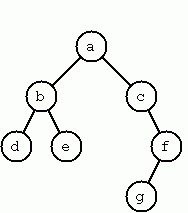

*Un arbre binaire est soit vide, soit composé d'un élément racine et
de deux successeurs, qui sont eux-mêmes des arbres binaires.*

En OCaml, on peut définir un nouveau type `binary_tree` qui porte une
valeur arbitraire de type `'a` (donc polymorphe) à chaque nœud.

```ocaml
# type 'a binary_tree =
  | Empty
  | Node of 'a * 'a binary_tree * 'a binary_tree;;
type 'a binary_tree = Empty | Node of 'a * 'a binary_tree * 'a binary_tree
```

Un exemple d'arbre portant des données de type `char` est :

```ocaml
# let example_tree =
  Node ('a', Node ('b', Node ('d', Empty, Empty), Node ('e', Empty, Empty)),
       Node ('c', Empty, Node ('f', Node ('g', Empty, Empty), Empty)));;
val example_tree : char binary_tree =
  Node ('a', Node ('b', Node ('d', Empty, Empty), Node ('e', Empty, Empty)),
   Node ('c', Empty, Node ('f', Node ('g', Empty, Empty), Empty)))
```

En OCaml, la discipline de typage stricte *garantit* que, si vous obtenez une
valeur de type `binary_tree`, alors elle doit avoir été créée avec les deux
constructeurs `Empty` et `Node`.

Dans un arbre binaire complètement équilibré, la propriété suivante est valable pour
chaque nœud : le nombre de nœuds dans son sous-arbre gauche et le nombre de
nœuds dans son sous-arbre droit sont presque égaux, ce qui signifie que leur
différence n'est pas supérieure à un.

Écrivez une fonction `cbal_tree` pour construire des arbres binaires complètement
équilibrés pour un nombre de nœuds donné. La fonction doit générer toutes les
solutions via le backtracking. Mettez la lettre `'x'` comme information dans tous
les nœuds de l'arbre.

```ocaml
# cbal_tree 4;;
- : char binary_tree/2 list =
[Node ('x', Node ('x', Empty, Empty),
  Node ('x', Node ('x', Empty, Empty), Empty));
 Node ('x', Node ('x', Empty, Empty),
  Node ('x', Empty, Node ('x', Empty, Empty)));
 Node ('x', Node ('x', Node ('x', Empty, Empty), Empty),
  Node ('x', Empty, Empty));
 Node ('x', Node ('x', Empty, Node ('x', Empty, Empty)),
  Node ('x', Empty, Empty))]
```
:::

In [ ]:
(* Votre réponse ici *)

:::{solution} ex44
:class: dropdown
:label: sol44

```ocaml
# (* Construire tous les arbres avec les sous-arbres [left] et [right] donnés. *)
  let add_trees_with left right all =
    let add_right_tree all l =
      List.fold_left (fun a r -> Node ('x', l, r) :: a) all right in
    List.fold_left add_right_tree all left

  let rec cbal_tree n =
    if n = 0 then [Empty]
    else if n mod 2 = 1 then
      let t = cbal_tree (n / 2) in
      add_trees_with t t []
    else (* n pair: n-1 nœuds pour les sous-arbres gauche et droit au total. *)
      let t1 = cbal_tree (n / 2 - 1) in
      let t2 = cbal_tree (n / 2) in
      add_trees_with t1 t2 (add_trees_with t2 t1 []);;
val add_trees_with :
  char binary_tree list ->
  char binary_tree list -> char binary_tree list -> char binary_tree list =
  <fun>
val cbal_tree : int -> char binary_tree list = <fun>
```
:::

:::{exercise} Arbres Binaires Symétriques 🟡
:label: ex45

**Tags:** `binary-tree`

Appelons un arbre binaire symétrique si vous pouvez tracer une ligne verticale
à travers le nœud racine et que le sous-arbre droit est l'image miroir du
sous-arbre gauche. Écrivez une fonction `is_symmetric` pour vérifier si un
arbre binaire donné est symétrique.

**Indice :** Écrivez d'abord une fonction `is_mirror` pour vérifier si un arbre
 est l'image miroir d'un autre. Nous ne nous intéressons qu'à la
 structure, pas au contenu des nœuds.
:::

In [ ]:
(* Votre réponse ici *)

:::{solution} ex45
:class: dropdown
:label: sol45

```ocaml
# let rec is_mirror t1 t2 =
    match t1, t2 with
    | Empty, Empty -> true
    | Node(_, l1, r1), Node(_, l2, r2) ->
       is_mirror l1 r2 && is_mirror r1 l2
    | _ -> false

  let is_symmetric = function
    | Empty -> true
    | Node(_, l, r) -> is_mirror l r;;
val is_mirror : 'a binary_tree -> 'b binary_tree -> bool = <fun>
val is_symmetric : 'a binary_tree -> bool = <fun>
```
:::

:::{exercise} Arbres Binaires de Recherche (Dictionnaires) 🟡
:label: ex46

**Tags:** `binary-tree`

Construire un 
[arbre binaire de recherche](https://fr.wikipedia.org/wiki/Arbre_binaire_de_recherche) 
à partir d'une liste de nombres entiers.

```ocaml
# construct [3; 2; 5; 7; 1];;
- : int binary_tree =
Node (3, Node (2, Node (1, Empty, Empty), Empty),
 Node (5, Empty, Node (7, Empty, Empty)))
```

Ensuite, utilisez cette fonction pour tester la solution du problème précédent.

```ocaml
# is_symmetric (construct [5; 3; 18; 1; 4; 12; 21]);;
- : bool = true
# not (is_symmetric (construct [3; 2; 5; 7; 4]));;
- : bool = true
```
:::

In [ ]:
(* Votre réponse ici *)

:::{solution} ex46
:class: dropdown
:label: sol46

```ocaml
# let rec insert tree x = match tree with
    | Empty -> Node (x, Empty, Empty)
    | Node (y, l, r) ->
       if x = y then tree
       else if x < y then Node (y, insert l x, r)
       else Node (y, l, insert r x)
  let construct l = List.fold_left insert Empty l;;
val insert : 'a binary_tree -> 'a -> 'a binary_tree = <fun>
val construct : 'a list -> 'a binary_tree = <fun>
```
:::

:::{exercise} Paradigme Générer-et-Tester 🟡
:label: ex47

**Tags:** `binary-tree`

Appliquez le paradigme générer-et-tester pour construire tous les arbres binaires
symétriques et complètement équilibrés avec un nombre de nœuds donné.

```ocaml
# sym_cbal_trees 5;;
- : char binary_tree list =
[Node ('x', Node ('x', Node ('x', Empty, Empty), Empty),
  Node ('x', Empty, Node ('x', Empty, Empty)));
 Node ('x', Node ('x', Empty, Node ('x', Empty, Empty)),
  Node ('x', Node ('x', Empty, Empty), Empty))]
```

Combien y a-t-il de tels arbres avec 57 nœuds ? Cherchez combien de
solutions il y a pour un nombre de nœuds donné. Et si le nombre est
pair ? Écrivez une fonction appropriée.

```ocaml
# List.length (sym_cbal_trees 57);;
- : int = 256
```
:::

In [ ]:
(* Votre réponse ici *)

:::{solution} ex47
:class: dropdown
:label: sol47

```ocaml
# let sym_cbal_trees n =
    List.filter is_symmetric (cbal_tree n);;
val sym_cbal_trees : int -> char binary_tree list = <fun>
```
:::

:::{exercise} Construire des Arbres Binaires Équilibrés en Hauteur 🟡
:label: ex48

**Tags:** `binary-tree`

Dans un arbre binaire équilibré en hauteur, la propriété suivante est valable pour chaque
nœud : la hauteur de son sous-arbre gauche et la hauteur de son sous-arbre droit
sont presque égales, ce qui signifie que leur différence n'est pas supérieure à un.

Écrivez une fonction `hbal_tree` pour construire des arbres binaires équilibrés en hauteur
pour une hauteur donnée. La fonction doit générer toutes les solutions via
le backtracking. Mettez la lettre `'x'` comme information dans tous les nœuds de
l'arbre.


```ocaml
# let t = hbal_tree 3;;
val t : char binary_tree list =
  [Node ('x', Node ('x', Empty, Node ('x', Empty, Empty)),
    Node ('x', Empty, Node ('x', Empty, Empty)));
   Node ('x', Node ('x', Empty, Node ('x', Empty, Empty)),
    Node ('x', Node ('x', Empty, Empty), Empty));
   Node ('x', Node ('x', Empty, Node ('x', Empty, Empty)),
    Node ('x', Node ('x', Empty, Empty), Node ('x', Empty, Empty)));
   Node ('x', Node ('x', Node ('x', Empty, Empty), Empty),
    Node ('x', Empty, Node ('x', Empty, Empty)));
   Node ('x', Node ('x', Node ('x', Empty, Empty), Empty),
    Node ('x', Node ('x', Empty, Empty), Empty));
   Node ('x', Node ('x', Node ('x', Empty, Empty), Empty),
    Node ('x', Node ('x', Empty, Empty), Node ('x', Empty, Empty)));
   Node ('x', Node ('x', Node ('x', Empty, Empty), Node ('x', Empty, Empty)),
    Node ('x', Empty, Node ('x', Empty, Empty)));
   Node ('x', Node ('x', Node ('x', Empty, Empty), Node ('x', Empty, Empty)),
    Node ('x', Node ('x', Empty, Empty), Empty));
   Node ('x', Node ('x', Node ('x', Empty, Empty), Node ('x', Empty, Empty)),
    Node ('x', Node ('x', Empty, Empty), Node ('x', Empty, Empty)));
   Node ('x', Node ('x', Empty, Node ('x', Empty, Empty)),
    Node ('x', Empty, Empty));
   Node ('x', Node ('x', Node ('x', Empty, Empty), Empty),
    Node ('x', Empty, Empty));
   Node ('x', Node ('x', Node ('x', Empty, Empty), Node ('x', Empty, Empty)),
    Node ('x', Empty, Empty));
   Node ('x', Node ('x', Empty, Empty),
    Node ('x', Empty, Node ('x', Empty, Empty)));
   Node ('x', Node ('x', Empty, Empty),
    Node ('x', Node ('x', Empty, Empty), Empty));
   Node ('x', Node ('x', Empty, Empty),
    Node ('x', Node ('x', Empty, Empty), Node ('x', Empty, Empty)))]
```
:::

In [ ]:
(* Votre réponse ici *)

:::{solution} ex48
:class: dropdown
:label: sol48

```ocaml
# let rec hbal_tree n =
    if n = 0 then [Empty]
    else if n = 1 then [Node ('x', Empty, Empty)]
    else
    (* [add_trees_with left right trees] est défini dans une question ci-dessus. *)
      let t1 = hbal_tree (n - 1)
      and t2 = hbal_tree (n - 2) in
      add_trees_with t1 t1 (add_trees_with t1 t2 (add_trees_with t2 t1 []));;
val hbal_tree : int -> char binary_tree list = <fun>
```
:::

:::{exercise} Construire des Arbres Binaires Équilibrés en Hauteur avec un Nombre de Nœuds Donné 🟡
:label: ex49

**Tags:** `binary-tree`

Considérez un arbre binaire équilibré en hauteur de hauteur `h`. Quel est le
nombre maximum de nœuds qu'il peut contenir ? Clairement,
max_nodes = 2<sup>`h`</sup> - 1.

```ocaml
# let max_nodes h = 1 lsl h - 1;;
val max_nodes : int -> int = <fun>
```

## Minimum de nœuds

Cependant, quel est le nombre minimum de nœuds min_nodes ? Cette question est plus
difficile. Essayez de trouver une déclaration récursive et de la transformer en une fonction
`min_nodes` définie comme suit : `min_nodes h` retourne le nombre minimum
de nœuds dans un arbre binaire équilibré en hauteur de hauteur `h`.

## Hauteur minimale

D'un autre côté, on pourrait se demander : quelles sont les hauteurs minimale (resp. maximale)
H qu'un
arbre binaire équilibré en hauteur avec N nœuds peut avoir ?
`min_height` (resp. `max_height n`) retourne
la hauteur minimale (resp. maximale) d'un arbre binaire équilibré en hauteur
avec `n` nœuds.

## Construire des arbres

Maintenant, nous pouvons aborder le problème principal : construire tous les arbres binaires
équilibrés en hauteur avec un nombre de nœuds donné. `hbal_tree_nodes n` retourne une
liste de tous les arbres binaires équilibrés en hauteur avec `n` nœuds.

Découvrez combien d'arbres équilibrés en hauteur existent pour `n = 15`.

```ocaml
# List.length (hbal_tree_nodes 15);;
- : int = 1553
```
:::

In [ ]:
(* Votre réponse ici *)

:::{solution} ex49
:class: dropdown
:label: sol49

```ocaml
# let rec min_nodes h =
    if h <= 0 then 0 
    else if h = 1 then 1
    else min_nodes (h - 1) + min_nodes (h - 2) + 1;;
val min_nodes : int -> int = <fun>
```
:::

:::{exercise} Compter les Feuilles d'un Arbre Binaire 🟢
:label: ex50

**Tags:** `binary-tree`

Une feuille est un nœud sans successeurs. Écrivez une fonction `count_leaves` pour
les compter.

```ocaml
# count_leaves Empty;;
- : int = 0
```
:::

In [ ]:
(* Votre réponse ici *)

:::{solution} ex50
:class: dropdown
:label: sol50

```ocaml
# let rec count_leaves = function
    | Empty -> 0
    | Node (_, Empty, Empty) -> 1
    | Node (_, l, r) -> count_leaves l + count_leaves r;;
val count_leaves : 'a binary_tree -> int = <fun>
```
:::

:::{exercise} Collecter les Feuilles d'un Arbre Binaire dans une Liste 🟢
:label: ex51

**Tags:** `binary-tree`

Une feuille est un nœud sans successeurs. Écrivez une fonction `leaves` pour
les collecter dans une liste.

```ocaml
# leaves Empty;;
- : 'a list = []
```
:::

In [ ]:
(* Votre réponse ici *)

:::{solution} ex51
:class: dropdown
:label: sol51

```ocaml
# (* Avoir un accumulateur acc évite d'utiliser l'inefficace List.append.
   * Chaque Feuille sera ajoutée directement dans l'accumulateur.
   * Non récursif terminal, mais ce n'est pas un problème car nous avons un arbre binaire et
   * la profondeur de la pile est logarithmique. *)
  let leaves t = 
    let rec leaves_aux t acc = match t with
      | Empty -> acc
      | Node (x, Empty, Empty) -> x :: acc
      | Node (x, l, r) -> leaves_aux l (leaves_aux r acc)
    in
    leaves_aux t [];;
val leaves : 'a binary_tree -> 'a list = <fun>
```
:::

:::{exercise} Collecter les Nœuds Internes d'un Arbre Binaire dans une Liste 🟢
:label: ex52

**Tags:** `binary-tree`

Un nœud interne d'un arbre binaire a un ou deux successeurs non vides.
Écrivez une fonction `internals` pour les collecter dans une liste.

```ocaml
# internals (Node ('a', Empty, Empty));;
- : char list = []
```
:::

In [ ]:
(* Votre réponse ici *)

:::{solution} ex52
:class: dropdown
:label: sol52

```ocaml
# (* Avoir un accumulateur acc évite d'utiliser l'inefficace List.append.
   * Chaque nœud interne sera ajouté directement dans l'accumulateur.
   * Non récursif terminal, mais ce n'est pas un problème car nous avons un arbre binaire et
   * la profondeur de la pile est logarithmique. *)
  let internals t = 
    let rec internals_aux t acc = match t with
      | Empty -> acc
      | Node (x, Empty, Empty) -> acc
      | Node (x, l, r) -> internals_aux l (x :: internals_aux r acc)
    in
    internals_aux t [];;
val internals : 'a binary_tree -> 'a list = <fun>
```
:::

:::{exercise} Collecter les Nœuds à un Niveau Donné dans une Liste 🟢
:label: ex53

**Tags:** `binary-tree`

Un nœud d'un arbre binaire est au niveau N si le chemin de la racine au
nœud a une longueur N-1. Le nœud racine est au niveau 1. Écrivez une fonction
`at_level t l` pour collecter tous les nœuds de l'arbre `t` au niveau `l` dans une
liste.

```ocaml
# let example_tree =
  Node ('a', Node ('b', Node ('d', Empty, Empty), Node ('e', Empty, Empty)),
       Node ('c', Empty, Node ('f', Node ('g', Empty, Empty), Empty)));;
val example_tree : char binary_tree =
  Node ('a', Node ('b', Node ('d', Empty, Empty), Node ('e', Empty, Empty)),
   Node ('c', Empty, Node ('f', Node ('g', Empty, Empty), Empty)))
# at_level example_tree 2;;
- : char list = ['b'; 'c']
```

En utilisant `at_level`, il est facile de construire une fonction `levelorder` qui
crée la séquence des nœuds par niveau. Cependant, il existe des moyens plus
efficaces de le faire.
:::

In [ ]:
(* Votre réponse ici *)

:::{solution} ex53
:class: dropdown
:label: sol53

```ocaml
# (* Avoir un accumulateur acc évite d'utiliser l'inefficace List.append.
   * Chaque nœud au niveau N sera ajouté directement dans l'accumulateur.
   * Non récursif terminal, mais ce n'est pas un problème car nous avons un arbre binaire et
   * la profondeur de la pile est logarithmique. *)
  let at_level t level =
    let rec at_level_aux t acc counter = match t with
      | Empty -> acc
      | Node (x, l, r) ->
        if counter=level then
          x :: acc
        else
          at_level_aux l (at_level_aux r acc (counter + 1)) (counter + 1)
    in
      at_level_aux t [] 1;;
val at_level : 'a binary_tree -> int -> 'a list = <fun>
```
:::

:::{exercise} Construire un Arbre Binaire Complet 🟡
:label: ex54

**Tags:** `binary-tree`

Un arbre binaire *complet* de hauteur H est défini comme suit : Les niveaux
1,2,3,...,H-1 contiennent le nombre maximum de nœuds (c'est-à-dire 2<sup>i-1</sup>
au niveau i, notez que nous commençons à compter les niveaux à partir de 1 à la
racine). Au niveau H, qui peut contenir moins que le nombre maximum possible
de nœuds, tous les nœuds sont "ajustés à gauche". Cela signifie que dans un
parcours d'arbre par niveau, tous les nœuds internes viennent en premier, les feuilles
viennent en second, et les successeurs vides (les nils qui ne sont pas vraiment des nœuds !)
viennent en dernier.

En particulier, les arbres binaires complets sont utilisés comme structures de données (ou
schémas d'adressage) pour les tas.

Nous pouvons attribuer un numéro d'adresse à chaque nœud d'un arbre binaire
complet en énumérant les nœuds par niveau, en commençant à la racine avec
le numéro 1. Ce faisant, nous réalisons que pour chaque nœud X avec l'adresse A
la propriété suivante est valable : L'adresse des successeurs gauche et droit de X
sont 2\*A et 2\*A+1, respectivement, si les successeurs existent.
Ce fait peut être utilisé pour construire élégamment une structure d'arbre binaire
complète. Écrivez une fonction `is_complete_binary_tree` avec la
spécification suivante : `is_complete_binary_tree n t` retourne `true`
si et seulement si `t` est un arbre binaire complet avec `n` nœuds.

```ocaml
# complete_binary_tree [1; 2; 3; 4; 5; 6];;
- : int binary_tree =
Node (1, Node (2, Node (4, Empty, Empty), Node (5, Empty, Empty)),
 Node (3, Node (6, Empty, Empty), Empty))
```
:::

In [ ]:
(* Votre réponse ici *)

:::{solution} ex54
:class: dropdown
:label: sol54

```ocaml
# let rec split_n lst acc n = match (n, lst) with
    | (0, _) -> (List.rev acc, lst)
    | (_, []) -> (List.rev acc, [])
    | (_, h :: t) -> split_n t (h :: acc) (n-1)

  let rec myflatten p c = 
    match (p, c) with
    | (p, []) -> List.map (fun x -> Node (x, Empty, Empty)) p
    | (x :: t, [y]) -> Node (x, y, Empty) :: myflatten t []
    | (ph :: pt, x :: y :: t) -> (Node (ph, x, y)) :: myflatten pt t
    | _ -> invalid_arg "myflatten"

  let complete_binary_tree = function
    | [] -> Empty
    | lst ->
       let rec aux l = function
         | [] -> []
         | lst -> let p, c = split_n lst [] (1 lsl l) in
                  myflatten p (aux (l + 1) c)
       in
         List.hd (aux 0 lst);;
val split_n : 'a list -> 'a list -> int -> 'a list * 'a list = <fun>
val myflatten : 'a list -> 'a binary_tree list -> 'a binary_tree list = <fun>
val complete_binary_tree : 'a list -> 'a binary_tree = <fun>
```
:::

:::{exercise} Mettre en Page un Arbre Binaire (1) 🟡
:label: ex55

**Tags:** `binary-tree`

En préparation du dessin de l'arbre, un algorithme de mise en page est requis pour
déterminer la position de chaque nœud dans une grille rectangulaire. Plusieurs
méthodes de mise en page sont envisageables, l'une d'elles est montrée dans l'illustration.


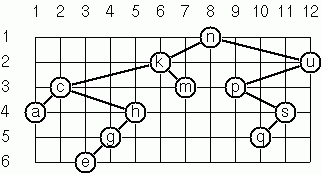

Dans cette stratégie de mise en page, la position d'un nœud v est obtenue par les
deux règles suivantes :

* *x(v)* est égal à la position du nœud v dans la séquence *infixe* ;
* *y(v)* est égal à la profondeur du nœud *v* dans l'arbre.

Pour stocker la position des nœuds, nous enrichirons la valeur
à chaque nœud avec la position `(x,y)`.

L'arbre illustré ci-dessus est
```ocaml
# let example_layout_tree =
  let leaf x = Node (x, Empty, Empty) in
  Node ('n', Node ('k', Node ('c', leaf 'a',
                           Node ('h', Node ('g', leaf 'e', Empty), Empty)),
                 leaf 'm'),
       Node ('u', Node ('p', Empty, Node ('s', leaf 'q', Empty)), Empty));;
val example_layout_tree : char binary_tree =
  Node ('n',
   Node ('k',
    Node ('c', Node ('a', Empty, Empty),
     Node ('h', Node ('g', Node ('e', Empty, Empty), Empty), Empty)),
    Node ('m', Empty, Empty)),
   Node ('u', Node ('p', Empty, Node ('s', Node ('q', Empty, Empty), Empty)),
    Empty))
```

```ocaml
# layout_binary_tree_1 example_layout_tree;;
- : (char * int * int) binary_tree =
Node (('n', 8, 1),
 Node (('k', 6, 2),
  Node (('c', 2, 3), Node (('a', 1, 4), Empty, Empty),
   Node (('h', 5, 4),
    Node (('g', 4, 5), Node (('e', 3, 6), Empty, Empty), Empty), Empty)),
  Node (('m', 7, 3), Empty, Empty)),
 Node (('u', 12, 2),
  Node (('p', 9, 3), Empty,
   Node (('s', 11, 4), Node (('q', 10, 5), Empty, Empty), Empty)),
  Empty))
```
:::

In [ ]:
(* Votre réponse ici *)

:::{solution} ex55
:class: dropdown
:label: sol55

```ocaml
# let layout_binary_tree_1 t =
    let rec layout depth x_left = function
      (* Cette fonction retourne une paire : l'arbre mis en page et la première
       * position x libre *)
      | Empty -> (Empty, x_left)
      | Node (v,l,r) ->
         let (l', l_x_max) = layout (depth + 1) x_left l in
         let (r', r_x_max) = layout (depth + 1) (l_x_max + 1) r in
           (Node ((v, l_x_max, depth), l', r'), r_x_max)
    in
      fst (layout 1 1 t);;
val layout_binary_tree_1 : 'a binary_tree -> ('a * int * int) binary_tree =
  <fun>
```
:::

:::{exercise} Mettre en Page un Arbre Binaire (2) 🟡
:label: ex56

**Tags:** `binary-tree`

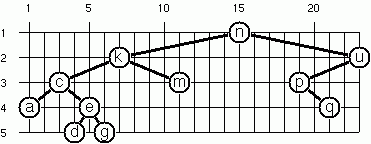

Une méthode de mise en page alternative est illustrée dans cette image. Trouvez
les règles et écrivez la fonction OCaml correspondante.

**Indice :** À un niveau donné, la distance horizontale entre
les nœuds voisins est constante.

L'arbre montré est 
```ocaml
# let example_layout_tree =
  let leaf x = Node (x, Empty, Empty) in
  Node ('n', Node ('k', Node ('c', leaf 'a',
                           Node ('e', leaf 'd', leaf 'g')),
                 leaf 'm'),
       Node ('u', Node ('p', Empty, leaf 'q'), Empty));;
val example_layout_tree : char binary_tree =
  Node ('n',
   Node ('k',
    Node ('c', Node ('a', Empty, Empty),
     Node ('e', Node ('d', Empty, Empty), Node ('g', Empty, Empty))),
    Node ('m', Empty, Empty)),
   Node ('u', Node ('p', Empty, Node ('q', Empty, Empty)), Empty))
```

```ocaml
# layout_binary_tree_2 example_layout_tree ;;
- : (char * int * int) binary_tree =
Node (('n', 15, 1),
 Node (('k', 7, 2),
  Node (('c', 3, 3), Node (('a', 1, 4), Empty, Empty),
   Node (('e', 5, 4), Node (('d', 4, 5), Empty, Empty),
    Node (('g', 6, 5), Empty, Empty))),
  Node (('m', 11, 3), Empty, Empty)),
 Node (('u', 23, 2),
  Node (('p', 19, 3), Empty, Node (('q', 21, 4), Empty, Empty)), Empty))
```
:::

In [ ]:
(* Votre réponse ici *)

:::{solution} ex56
:class: dropdown
:label: sol56

```ocaml
# let layout_binary_tree_2 t =
    let rec height = function
      | Empty -> 0
      | Node (_, l, r) -> 1 + max (height l) (height r) in
    let tree_height = height t in
    let rec find_missing_left depth = function
      | Empty -> tree_height - depth
      | Node (_, l, _) -> find_missing_left (depth + 1) l in
    let translate_dst = 1 lsl (find_missing_left 0 t) - 1 in
                        (* rappelez-vous que 1 lsl a = 2ᵃ *)
    let rec layout depth x_root = function
      | Empty -> Empty
      | Node (x, l, r) ->
         let spacing = 1 lsl (tree_height - depth - 1) in
         let l' = layout (depth + 1) (x_root - spacing) l
         and r' = layout (depth + 1) (x_root + spacing) r in
           Node((x, x_root, depth), l',r') in
    layout 1 ((1 lsl (tree_height - 1)) - translate_dst) t;;
val layout_binary_tree_2 : 'a binary_tree -> ('a * int * int) binary_tree =
  <fun>
```
:::

:::{exercise} Mettre en Page un Arbre Binaire (3) 🔴
:label: ex57

**Tags:** `binary-tree`

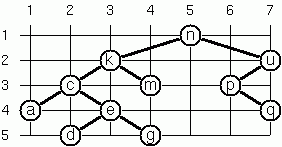

Encore une autre stratégie de mise en page est montrée dans l'illustration ci-dessus. La
méthode produit une mise en page très compacte tout en maintenant une certaine symétrie
dans chaque nœud. Trouvez les règles et écrivez le
prédicat correspondant.

**Indice :** Considérez la distance horizontale entre un nœud et ses successeurs.
À quel point pouvez-vous serrer deux sous-arbres pour construire
l'arbre binaire combiné ? C'est un problème difficile. N'abandonnez pas trop
tôt !

```ocaml
# let example_layout_tree =
  let leaf x = Node (x, Empty, Empty) in
  Node ('n', Node ('k', Node ('c', leaf 'a',
                           Node ('h', Node ('g', leaf 'e', Empty), Empty)),
                 leaf 'm'),
       Node ('u', Node ('p', Empty, Node ('s', leaf 'q', Empty)), Empty));;
val example_layout_tree : char binary_tree =
  Node ('n',
   Node ('k',
    Node ('c', Node ('a', Empty, Empty),
     Node ('h', Node ('g', Node ('e', Empty, Empty), Empty), Empty)),
    Node ('m', Empty, Empty)),
   Node ('u', Node ('p', Empty, Node ('s', Node ('q', Empty, Empty), Empty)),
    Empty))
# layout_binary_tree_3 example_layout_tree ;;
- : (char * int * int) binary_tree =
Node (('n', 5, 1),
 Node (('k', 3, 2),
  Node (('c', 2, 3), Node (('a', 1, 4), Empty, Empty),
   Node (('h', 3, 4),
    Node (('g', 2, 5), Node (('e', 1, 6), Empty, Empty), Empty), Empty)),
  Node (('m', 4, 3), Empty, Empty)),
 Node (('u', 7, 2),
  Node (('p', 6, 3), Empty,
   Node (('s', 7, 4), Node (('q', 6, 5), Empty, Empty), Empty)),
  Empty))
```

Quelle mise en page préférez-vous ?
:::

In [ ]:
(* Votre réponse ici *)

:::{solution} ex57
:class: dropdown
:label: sol57

```ocaml
# let layout_binary_tree_3 =
    let rec translate_x d = function
      | Empty -> Empty
      | Node ((v, x, y), l, r) ->
         Node ((v, x + d, y), translate_x d l, translate_x d r) in
    (* Distance entre un sous-arbre gauche donné par son profil droit [lr]
       et un sous-arbre droit donné par son profil gauche [rl]. *)
    let rec dist lr rl = match lr, rl with
      | lrx :: ltl, rlx :: rtl -> max (lrx - rlx) (dist ltl rtl)
      | [], _ | _, [] -> 0 in
    let rec merge_profiles p1 p2 = match p1, p2 with
      | x1 :: tl1, _ :: tl2 -> x1 :: merge_profiles tl1 tl2
      | [], _ -> p2
      | _, [] -> p1 in
    let rec layout depth = function
      | Empty -> ([], Empty, [])
      | Node (v, l, r) ->
         let (ll, l', lr) = layout (depth + 1) l in
         let (rl, r', rr) = layout (depth + 1) r in
         let d = 1 + dist lr rl / 2 in
         let ll = List.map (fun x -> x - d) ll
         and lr = List.map (fun x -> x - d) lr
         and rl = List.map ((+) d) rl
         and rr = List.map ((+) d) rr in
         (0 :: merge_profiles ll rl,
          Node((v, 0, depth), translate_x (-d) l', translate_x d r'),
          0 :: merge_profiles rr lr) in
    fun t -> let (l, t', _) = layout 1 t in
             let x_min = List.fold_left min 0 l in
             translate_x (1 - x_min) t';;
val layout_binary_tree_3 : 'a binary_tree -> ('a * int * int) binary_tree =
  <fun>
```
:::

:::{exercise} Une Représentation en Chaîne de Caractères des Arbres Binaires 🟡
:label: ex58

**Tags:** `binary-tree`

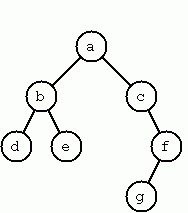

Quelqu'un représente les arbres binaires comme des chaînes de caractères du type suivant (voir
exemple) : `"a(b(d,e),c(,f(g,)))"`.

* Écrivez une fonction OCaml `string_of_tree` qui génère cette
 représentation en chaîne,
 si l'arbre est donné comme d'habitude (comme un terme `Empty` ou `Node(x,l,r)`).
 Ensuite, écrivez une fonction `tree_of_string` qui fait l'inverse ;
 c'est-à-dire, étant donné la représentation
 en chaîne, construisez l'arbre dans la forme habituelle. Enfin,
 combinez les deux prédicats en une seule fonction `tree_string` qui
 peut être utilisée dans les deux directions.
* Écrivez le même prédicat `tree_string` en utilisant des listes de différence et un
 seul prédicat `tree_dlist` qui effectue la conversion entre un
 arbre et une liste de différence dans les deux directions.

Pour simplifier, supposez que l'information dans les nœuds est une seule lettre
et qu'il n'y a pas d'espaces dans la chaîne.

```ocaml
# let example_layout_tree =
  let leaf x = Node (x, Empty, Empty) in
    (Node ('a', Node ('b', leaf 'd', leaf 'e'),
     Node ('c', Empty, Node ('f', leaf 'g', Empty))));;
val example_layout_tree : char binary_tree =
  Node ('a', Node ('b', Node ('d', Empty, Empty), Node ('e', Empty, Empty)),
   Node ('c', Empty, Node ('f', Node ('g', Empty, Empty), Empty)))
```
:::

In [ ]:
(* Votre réponse ici *)

:::{solution} ex58
:class: dropdown
:label: sol58

```ocaml
# let rec string_of_tree = function
    | Empty -> ""
    | Node(data, l, r) ->
       let data = String.make 1 data in
       match l, r with
       | Empty, Empty -> data
       | _, _ -> data ^ "(" ^ (string_of_tree l)
                 ^ "," ^ (string_of_tree r) ^ ")";;
val string_of_tree : char binary_tree -> string = <fun>
```
:::

:::{exercise} Séquences Préfixe et Infixe des Arbres Binaires 🟡
:label: ex59

**Tags:** `binary-tree`

Nous considérons des arbres binaires avec des nœuds identifiés par des lettres
minuscules uniques, comme dans l'exemple du problème précédent.

1. Écrivez les fonctions `preorder` et `inorder`
   qui construisent les
   séquences [préfixe](https://fr.wikipedia.org/wiki/Parcours_d%27arbre#Parcours_pr%C3%A9fixe)
   et
   [infixe](https://fr.wikipedia.org/wiki/Parcours_d%27arbre#Parcours_infixe)
   d'un arbre binaire donné, respectivement. Les
   résultats doivent être des atomes, par exemple 'abdecfg' pour la séquence préfixe de
   l'exemple du problème précédent.
1. Pouvez-vous utiliser `preorder` de la partie 1 du problème dans la direction
   inverse ; c'est-à-dire, étant donné une séquence préfixe, construire un arbre
   correspondant ? Sinon, faites les arrangements nécessaires.
1. Si la séquence préfixe et la séquence infixe des nœuds
   d'un arbre binaire sont données, alors l'arbre est déterminé
   sans ambiguïté. Écrivez une fonction `pre_in_tree` qui fait le travail.
1. Résolvez les problèmes 1 à 3 en utilisant des
   [listes de différence](https://en.wikipedia.org/wiki/Difference_list).
   Cool ! Utilisez la
   fonction `timeit` (définie dans le problème “[Comparer les deux méthodes de
   calcul de l'indicatrice d'Euler.](#38)”) pour comparer les
   solutions.

Que se passe-t-il si le même caractère apparaît dans plus d'un nœud. Essayez
par exemple `pre_in_tree "aba" "baa"`.

```ocaml
# preorder (Node (1, Node (2, Empty, Empty), Empty));;
- : int list = [1; 2]
```
:::

In [ ]:
(* Votre réponse ici *)

:::{solution} ex59
:class: dropdown
:label: sol59

```ocaml
# let rec preorder = function
    | Empty -> []
    | Node (v, l, r) -> v :: (preorder l @ preorder r)
    let rec inorder = function
    | Empty -> []
    | Node (v, l, r) -> inorder l @ (v :: inorder r)
    let rec split_pre_in p i x accp acci = match (p, i) with
    | [], [] -> (List.rev accp, List.rev acci), ([], [])
    | h1 :: t1, h2 :: t2 ->
       if x = h2 then
         (List.tl (List.rev (h1 :: accp)), t1),
         (List.rev (List.tl (h2 :: acci)), t2)
       else
         split_pre_in t1 t2 x (h1 :: accp) (h2 :: acci)
    | _ -> assert false
    let rec pre_in_tree p i = match (p, i) with
    | [], [] -> Empty
    | (h1 :: t1), (h2 :: t2) ->
       let (lp, rp), (li, ri) = split_pre_in p i h1 [] [] in
         Node (h1, pre_in_tree lp li, pre_in_tree rp ri)
    | _ -> invalid_arg "pre_in_tree";;
val preorder : 'a binary_tree -> 'a list = <fun>
val inorder : 'a binary_tree -> 'a list = <fun>
val split_pre_in :
  'a list ->
  'a list ->
  'a -> 'a list -> 'a list -> ('a list * 'a list) * ('a list * 'a list) =
  <fun>
val pre_in_tree : 'a list -> 'a list -> 'a binary_tree = <fun>
```
:::

:::{exercise} Représentation Pointée des Arbres Binaires 🟡
:label: ex60

**Tags:** `binary-tree`

Nous considérons à nouveau des arbres binaires avec des nœuds identifiés par des lettres
minuscules uniques, comme dans l'exemple du problème “[Une représentation en chaîne
de caractères des arbres binaires](#67)”. Un tel arbre peut être
représenté par la séquence préfixe de ses nœuds dans laquelle des points (.) sont
insérés là où un sous-arbre vide (nil) est rencontré pendant le
parcours de l'arbre. Par exemple, l'arbre montré dans le problème “[Une représentation en chaîne
de caractères des arbres binaires](#67)” est représenté par
'abd..e..c.fg...'. D'abord, essayez d'établir une syntaxe (BNF ou diagrammes
de syntaxe) puis écrivez une fonction `tree_dotstring` qui fait la
conversion dans les deux directions. Utilisez des listes de différence.
:::

In [ ]:
(* Votre réponse ici *)

:::{solution} ex60
:class: dropdown
:label: sol60

```ocaml
(* solution en attente *)
```
:::

:::{exercise} Construction d'Arbre à partir d'une Chaîne de Nœuds 🟡
:label: ex61

**Tags:** `multiway-tree`

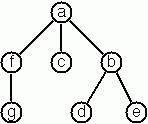

*Un arbre n-aire est composé d'un élément racine et d'un
ensemble (éventuellement vide) de successeurs qui sont eux-mêmes des arbres n-aires.
Un arbre n-aire n'est jamais vide. L'ensemble des arbres successeurs est parfois
appelé une forêt.*

Pour représenter les arbres n-aires, nous utiliserons le type suivant qui est une
traduction directe de la définition :

```ocaml
# type 'a mult_tree = T of 'a * 'a mult_tree list;;
type 'a mult_tree = T of 'a * 'a mult_tree list
```

L'arbre d'exemple représenté ci-contre est donc représenté par
l'expression OCaml suivante :

```ocaml
# T ('a', [T ('f', [T ('g', [])]); T ('c', []); T ('b', [T ('d', []); T ('e', [])])]);;
- : char mult_tree =
T ('a',
 [T ('f', [T ('g', [])]); T ('c', []); T ('b', [T ('d', []); T ('e', [])])])
```

Nous supposons que les nœuds d'un arbre n-aire contiennent des caractères uniques.
Dans la séquence de parcours en profondeur de ses nœuds, un caractère spécial `^`
a été inséré chaque fois que, pendant le parcours de l'arbre, le mouvement est un
retour en arrière au niveau précédent.

Selon cette règle, l'arbre de la figure ci-contre est représenté par :
`afg^^c^bd^e^^^`.

Écrivez les fonctions `string_of_tree : char mult_tree -> string` pour construire
la chaîne représentant l'arbre et
`tree_of_string : string -> char mult_tree` pour construire l'arbre lorsque
la chaîne est donnée.


```ocaml
# let t = T ('a', [T ('f', [T ('g', [])]); T ('c', []);
          T ('b', [T ('d', []); T ('e', [])])]);;
val t : char mult_tree =
  T ('a',
   [T ('f', [T ('g', [])]); T ('c', []); T ('b', [T ('d', []); T ('e', [])])])
```
:::

In [ ]:
(* Votre réponse ici *)

:::{solution} ex61
:class: dropdown
:label: sol61

```ocaml
# (* Nous pourrions construire la chaîne finale par concaténation de chaînes mais
     c'est coûteux en raison du nombre d'opérations. Nous utilisons un
     tampon à la place. *)
  let rec add_string_of_tree buf (T (c, sub)) =
    Buffer.add_char buf c;
    List.iter (add_string_of_tree buf) sub;
    Buffer.add_char buf '^';;
val add_string_of_tree : Buffer.t -> char mult_tree -> unit = <fun>

# let string_of_tree t =
    let buf = Buffer.create 128 in
    add_string_of_tree buf t;
    Buffer.contents buf;;

val string_of_tree : char mult_tree -> string = <fun>

# let tree_of_string s =
    let rec parse_node chars =
      match chars with
      | [] -> failwith "Fin d'entrée inattendue (attend un nœud)"
      | c :: rest ->
          let (children, rest') = parse_children rest in
          (T (c, children), rest')
    and parse_children chars =
      match chars with
      | [] -> failwith "Fin d'entrée inattendue (attend ^)"
      | '^' :: rest -> ([], rest)
      | _ ->
          let (child, rest') = parse_node chars in
          let (siblings, rest'') = parse_children rest' in
          (child :: siblings, rest'')
    in
    let (tree, remaining) = parse_node (List.of_seq (String.to_seq s)) in
    match remaining with
    | [] -> tree
    | _ -> failwith "Entrée supplémentaire après l'arbre";;
val tree_of_string : string -> char mult_tree = <fun>
```
:::

:::{exercise} Compter les Nœuds d'un Arbre N-aire 🟢
:label: ex62

**Tags:** `multiway-tree`

```ocaml
# count_nodes (T ('a', [T ('f', []) ]));;
- : int = 2
```
:::

In [ ]:
(* Votre réponse ici *)

:::{solution} ex62
:class: dropdown
:label: sol62

```ocaml
# let rec count_nodes (T (_, sub)) =
    List.fold_left (fun n t -> n + count_nodes t) 1 sub;;
val count_nodes : 'a mult_tree -> int = <fun>
```
:::

:::{exercise} Déterminer la Longueur du Chemin Interne d'un Arbre 🟢
:label: ex63

**Tags:** `multiway-tree`

Nous définissons la longueur du chemin interne d'un arbre n-aire comme la somme totale
des longueurs des chemins de la racine à tous les nœuds de l'arbre. Par cette
définition, l'arbre `t` de la figure du problème précédent a une
longueur de chemin interne de 9. Écrivez une fonction `ipl tree` qui retourne la
longueur du chemin interne de `tree`.

```ocaml
# ipl t;;
- : int = 9
```
:::

In [ ]:
(* Votre réponse ici *)

:::{solution} ex63
:class: dropdown
:label: sol63

```ocaml
# let rec ipl_sub len (T(_, sub)) =
    (* [len] est la distance du nœud courant à la racine. Ajoutez la
       distance de tous les sous-nœuds. *)
    List.fold_left (fun sum t -> sum + ipl_sub (len + 1) t) len sub
  let ipl t = ipl_sub 0 t;;
val ipl_sub : int -> 'a mult_tree -> int = <fun>
val ipl : 'a mult_tree -> int = <fun>
```
:::

:::{exercise} Construire la Séquence des Nœuds de l'Arbre dans l'Ordre Ascendant 🟢
:label: ex64

**Tags:** `multiway-tree`

Écrivez une fonction `bottom_up t` qui construit la séquence
ascendante (bottom-up) des nœuds de l'arbre n-aire `t`.

```ocaml
# bottom_up (T ('a', [T ('b', [])]));;
- : char list = ['b'; 'a']
# bottom_up t;;
- : char list = ['g'; 'f'; 'c'; 'd'; 'e'; 'b'; 'a']
```
:::

In [ ]:
(* Votre réponse ici *)

:::{solution} ex64
:class: dropdown
:label: sol64

```ocaml
# let rec prepend_bottom_up (T (c, sub)) l =
    List.fold_right (fun t l -> prepend_bottom_up t l) sub (c :: l)
  let bottom_up t = prepend_bottom_up t [];;
val prepend_bottom_up : 'a mult_tree -> 'a list -> 'a list = <fun>
val bottom_up : 'a mult_tree -> 'a list = <fun>
```
:::

:::{exercise} Représentation d'Arbre de Type Lisp 🟡
:label: ex65

**Tags:** `multiway-tree`

Il existe une notation particulière pour les arbres n-aires en Lisp. L'image
montre comment les structures d'arbres n-aires sont représentées en Lisp.

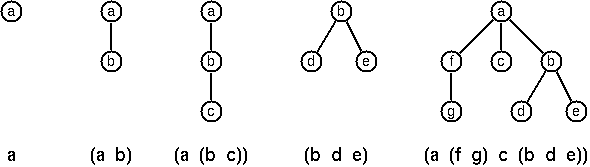

Notez que dans la notation "lispy", un nœud avec des successeurs (enfants) dans
l'arbre est toujours le premier élément d'une liste, suivi de ses
enfants. La représentation "lispy" d'un arbre n-aire est une séquence
d'atomes et de parenthèses '(' et ')'. C'est très proche de la façon dont les arbres
sont représentés en OCaml, sauf qu'aucun constructeur `T` n'est utilisé. Écrivez
une fonction `lispy : char mult_tree -> string` qui retourne la
notation lispy de l'arbre.

```ocaml
# lispy (T ('a', []));;
- : string = "a"
# lispy (T ('a', [T ('b', [])]));;
- : string = "(a b)"
# lispy t;;
- : string = "(a (f g) c (b d e))"
```
:::

In [ ]:
(* Votre réponse ici *)

:::{solution} ex65
:class: dropdown
:label: sol65

```ocaml
# let rec add_lispy buf = function
    | T(c, []) -> Buffer.add_char buf c
    | T(c, sub) ->
       Buffer.add_char buf '(';
       Buffer.add_char buf c;
       List.iter (fun t -> Buffer.add_char buf ' '; add_lispy buf t) sub;
       Buffer.add_char buf ')'
  let lispy t =
    let buf = Buffer.create 128 in
    add_lispy buf t;
    Buffer.contents buf;;
val add_lispy : Buffer.t -> char mult_tree -> unit = <fun>
val lispy : char mult_tree -> string = <fun>
```
:::

:::{exercise} Conversions 🟢
:label: ex66

**Tags:** `graph`

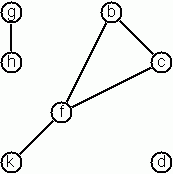

*Un graphe est défini comme un ensemble de nœuds et un ensemble d'arêtes, où chaque
arête est une paire de nœuds différents.*

Il existe plusieurs façons de représenter les graphes en OCaml.

* Une méthode consiste à lister toutes les arêtes, une arête étant une paire de nœuds. Sous
 cette forme, le graphe représenté ci-dessus est représenté par
 l'expression suivante :

```ocaml
# [('h', 'g'); ('k', 'f'); ('f', 'b'); ('f', 'c'); ('c', 'b')];;
- : (char * char) list =
[('h', 'g'); ('k', 'f'); ('f', 'b'); ('f', 'c'); ('c', 'b')]
```

Nous appelons cela la **forme de clause d'arête**. Évidemment, les nœuds isolés ne peuvent
pas être représentés.


* Une autre méthode consiste à représenter le graphe entier comme un seul objet de données.
 Selon la définition du graphe comme une paire de deux ensembles
 (nœuds et arêtes), nous pouvons utiliser le type OCaml suivant :

```ocaml
# type 'a graph_term = {nodes : 'a list;  edges : ('a * 'a) list};;
type 'a graph_term = { nodes : 'a list; edges : ('a * 'a) list; }
```

Alors, l'exemple de graphe ci-dessus est représenté par :

```ocaml
# let example_graph =
  {nodes = ['b'; 'c'; 'd'; 'f'; 'g'; 'h'; 'k'];
   edges = [('h', 'g'); ('k', 'f'); ('f', 'b'); ('f', 'c'); ('c', 'b')]};;
val example_graph : char graph_term =
  {nodes = ['b'; 'c'; 'd'; 'f'; 'g'; 'h'; 'k'];
   edges = [('h', 'g'); ('k', 'f'); ('f', 'b'); ('f', 'c'); ('c', 'b')]}
```

Nous appelons cela la **forme de terme de graphe**. Notez que les listes sont conservées
triées, ce sont réellement des ensembles, sans éléments dupliqués. Chaque arête
apparaît une seule fois dans la liste des arêtes ; c'est-à-dire une arête d'un nœud x à
un autre nœud y est représentée par `(x, y)`, le couple `(y, x)` n'est pas
présent. La **forme de terme de graphe est notre représentation par défaut.** Vous
pouvez vouloir définir un type similaire en utilisant des ensembles au lieu de listes.

* Une troisième méthode de représentation consiste à associer à chaque nœud l'ensemble
 des nœuds qui lui sont adjacents. Nous appelons cela la
 **forme de liste d'adjacence**. Dans notre exemple :

```ocaml
let adjacency_example = ['b', ['c'; 'f'];
                         'c', ['b'; 'f'];
                         'd', [];
                         'f', ['b'; 'c'; 'k'];
                         'g', ['h'];
                         'h', ['g'];
                         'k', ['f']
                         ];;
val adjacency_example : (char * char list) list =
  [('b', ['c'; 'f']); ('c', ['b'; 'f']); ('d', []); ('f', ['b'; 'c'; 'k']);
   ('g', ['h']); ('h', ['g']); ('k', ['f'])]
```

* Les représentations que nous avons introduites jusqu'à présent sont bien adaptées au
 traitement automatisé, mais leur syntaxe n'est pas très conviviale. Taper les
 termes à la main est fastidieux et source d'erreurs. Nous pouvons définir une notation plus
 compacte et "conviviale" comme suit : Un graphe (avec des nœuds étiquetés par des caractères)
 est représenté par une chaîne d'atomes et de termes du
 type X-Y. Les atomes représentent les nœuds isolés, les termes X-Y décrivent
 les arêtes. Si un X apparaît comme une extrémité d'une arête, il est
 automatiquement défini comme un nœud. Notre exemple pourrait être écrit comme suit :

```ocaml
# "b-c f-c g-h d f-b k-f h-g";;
- : string = "b-c f-c g-h d f-b k-f h-g"
```

Nous appelons cela la **forme conviviale**. Comme le montre l'exemple, la
liste n'a pas besoin d'être triée et peut même contenir la même arête
plusieurs fois. Notez le nœud isolé `d`.

Écrivez des fonctions pour convertir entre les différentes représentations de graphes.
Avec ces fonctions, toutes les représentations sont équivalentes ; c'est-à-dire que pour les
problèmes suivants, vous pouvez toujours choisir librement la forme la plus pratique.
Ce problème n'est pas particulièrement difficile, mais c'est beaucoup de travail pour
traiter tous les cas spéciaux.
:::

In [ ]:
(* Votre réponse ici *)

:::{solution} ex66
:class: dropdown
:label: sol66

```ocaml
(* exemple en attente *)
```
:::

:::{exercise} Chemin d'un Nœud à un Autre 🟡
:label: ex67

**Tags:** `graph`

Écrivez une fonction `paths g a b` qui retourne tous les chemins acycliques `p` du
nœud `a` au nœud `b ≠ a` dans le graphe `g`. La fonction doit retourner
la liste de tous les chemins via le backtracking.

```ocaml
# let example_graph =
  {nodes = ['b'; 'c'; 'd'; 'f'; 'g'; 'h'; 'k'];
   edges = [('h', 'g'); ('k', 'f'); ('f', 'b'); ('f', 'c'); ('c', 'b')]};;
val example_graph : char graph_term =
  {nodes = ['b'; 'c'; 'd'; 'f'; 'g'; 'h'; 'k'];
   edges = [('h', 'g'); ('k', 'f'); ('f', 'b'); ('f', 'c'); ('c', 'b')]}
# paths example_graph 'f' 'b';;
- : char list list = [['f'; 'c'; 'b']; ['f'; 'b']]
```
:::

In [ ]:
(* Votre réponse ici *)

:::{solution} ex67
:class: dropdown
:label: sol67

```ocaml
# (* Les structures de données utilisées ici sont loin d'être les plus efficaces
     mais permettent une implémentation simple. *)
  (* Retourne tous les voisins satisfaisant la condition. *)
  let neighbors g a cond =
    let edge l (b, c) = if b = a && cond c then c :: l
                        else if c = a && cond b then b :: l
                        else l in
    List.fold_left edge [] g.edges
  let rec list_path g a to_b = match to_b with
    | [] -> assert false (* [to_b] contient le chemin vers [b]. *)
    | a' :: _ ->
       if a' = a then [to_b]
       else
         let n = neighbors g a' (fun c -> not (List.mem c to_b)) in
           List.concat_map (fun c -> list_path g a (c :: to_b)) n

  let paths g a b =
    assert(a <> b);
    list_path g a [b];;
val neighbors : 'a graph_term -> 'a -> ('a -> bool) -> 'a list = <fun>
val list_path : 'a graph_term -> 'a -> 'a list -> 'a list list = <fun>
val paths : 'a graph_term -> 'a -> 'a -> 'a list list = <fun>
```
:::

:::{exercise} Cycle à Partir d'un Nœud Donné 🟢
:label: ex68

**Tags:** `graph`

Écrivez une fonction `cycle g a` qui retourne un chemin fermé (cycle) `p`
commençant à un nœud donné `a` dans le graphe `g`. Le prédicat doit
retourner la liste de tous les cycles via le backtracking.

```ocaml
# let example_graph =
  {nodes = ['b'; 'c'; 'd'; 'f'; 'g'; 'h'; 'k'];
   edges = [('h', 'g'); ('k', 'f'); ('f', 'b'); ('f', 'c'); ('c', 'b')]};;
val example_graph : char graph_term =
  {nodes = ['b'; 'c'; 'd'; 'f'; 'g'; 'h'; 'k'];
   edges = [('h', 'g'); ('k', 'f'); ('f', 'b'); ('f', 'c'); ('c', 'b')]}
# cycles example_graph 'f';;
- : char list list =
[['f'; 'b'; 'c'; 'f']; ['f'; 'c'; 'f']; ['f'; 'c'; 'b'; 'f'];
 ['f'; 'b'; 'f']; ['f'; 'k'; 'f']]
```
:::

In [ ]:
(* Votre réponse ici *)

:::{solution} ex68
:class: dropdown
:label: sol68

```ocaml
# let cycles g a =
    let n = neighbors g a (fun _ -> true) in
    let p = List.concat_map (fun c -> list_path g a [c]) n in
    List.map (fun p -> p @ [a]) p;;
val cycles : 'a graph_term -> 'a -> 'a list list = <fun>
```
:::

:::{exercise} Construire Tous les Arbres Couvrants 🟡
:label: ex69

**Tags:** `graph`

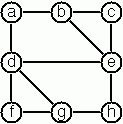

Écrivez une fonction `s_tree g` pour construire (par backtracking) tous les [arbres
couvrants](https://fr.wikipedia.org/wiki/Arbre_couvrant) d'un graphe donné `g`.
Avec ce prédicat, trouvez combien d'arbres couvrants il y a pour le
graphe représenté à gauche. Les données de cet exemple de graphe se trouvent
dans le test ci-dessous. Lorsque vous avez une solution correcte pour la fonction `s_tree`,
utilisez-la pour définir deux autres fonctions utiles : `is_tree graph`
et `is_connected Graph`. Les deux sont des tâches de cinq minutes !

```ocaml
# let g = {nodes = ['a'; 'b'; 'c'; 'd'; 'e'; 'f'; 'g'; 'h'];
         edges = [('a', 'b'); ('a', 'd'); ('b', 'c'); ('b', 'e');
                  ('c', 'e'); ('d', 'e'); ('d', 'f'); ('d', 'g');
                  ('e', 'h'); ('f', 'g'); ('g', 'h')]};;
val g : char graph_term =
  {nodes = ['a'; 'b'; 'c'; 'd'; 'e'; 'f'; 'g'; 'h'];
   edges =
    [('a', 'b'); ('a', 'd'); ('b', 'c'); ('b', 'e'); ('c', 'e'); ('d', 'e');
     ('d', 'f'); ('d', 'g'); ('e', 'h'); ('f', 'g'); ('g', 'h')]}
```
:::

In [ ]:
(* Votre réponse ici *)

:::{solution} ex69
:class: dropdown
:label: sol69

```ocaml
(* solution en attente *);;
```
:::

:::{exercise} Construire l'Arbre Couvrant Minimal 🟡
:label: ex70

**Tags:** `graph`

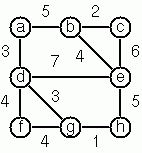

Écrivez une fonction `ms_tree graph` pour construire l'arbre couvrant minimal
d'un graphe étiqueté donné. Un graphe étiqueté sera représenté comme
suit :

```ocaml
# type ('a, 'b) labeled_graph = {nodes : 'a list;
                               labeled_edges : ('a * 'a * 'b) list};;
type ('a, 'b) labeled_graph = {
  nodes : 'a list;
  labeled_edges : ('a * 'a * 'b) list;
}
```

(Attention, à partir de maintenant, `nodes` et `edges` masquent les champs précédents
du même nom.)

**Indice :** Utilisez l'[algorithme de Prim](https://fr.wikipedia.org/wiki/Algorithme_de_Prim).
Une petite modification de la solution de P83 fait l'affaire. Les données de l'exemple
de graphe à droite se trouvent ci-dessous.

```ocaml
# let g = {nodes = ['a'; 'b'; 'c'; 'd'; 'e'; 'f'; 'g'; 'h'];
         labeled_edges = [('a', 'b', 5); ('a', 'd', 3); ('b', 'c', 2);
                          ('b', 'e', 4); ('c', 'e', 6); ('d', 'e', 7);
                          ('d', 'f', 4); ('d', 'g', 3); ('e', 'h', 5);
                          ('f', 'g', 4); ('g', 'h', 1)]};;
val g : (char, int) labeled_graph =
  {nodes = ['a'; 'b'; 'c'; 'd'; 'e'; 'f'; 'g'; 'h'];
   labeled_edges =
    [('a', 'b', 5); ('a', 'd', 3); ('b', 'c', 2); ('b', 'e', 4);
     ('c', 'e', 6); ('d', 'e', 7); ('d', 'f', 4); ('d', 'g', 3);
     ('e', 'h', 5); ('f', 'g', 4); ('g', 'h', 1)]}
```
:::

In [ ]:
(* Votre réponse ici *)

:::{solution} ex70
:class: dropdown
:label: sol70

```ocaml
(* solution en attente *);;
```
:::

:::{exercise} Isomorphisme de Graphes 🟡
:label: ex71

**Tags:** `graph`

Deux graphes G1(N1,E1) et G2(N2,E2) sont isomorphes s'il existe une
bijection f: N1 → N2 telle que pour tous les nœuds X,Y de N1, X et Y sont
adjacents si et seulement si f(X) et f(Y) sont adjacents.

Écrivez une fonction qui détermine si deux graphes sont isomorphes.

**Indice :** Utilisez une liste ouverte pour représenter la fonction f.

```ocaml
# let g = {nodes = [1; 2; 3; 4; 5; 6; 7; 8];
         edges = [(1, 5); (1, 6); (1, 7); (2, 5); (2, 6); (2, 8); (3, 5);
                  (3, 7); (3, 8); (4, 6); (4, 7); (4, 8)]};;
val g : int graph_term =
  {nodes = [1; 2; 3; 4; 5; 6; 7; 8];
   edges =
    [(1, 5); (1, 6); (1, 7); (2, 5); (2, 6); (2, 8); (3, 5); (3, 7);
     (3, 8); (4, 6); (4, 7); (4, 8)]}
```
:::

In [ ]:
(* Votre réponse ici *)

:::{solution} ex71
:class: dropdown
:label: sol71

```ocaml
(* solution en attente *);;
```
:::

:::{exercise} Degré des Nœuds et Coloration de Graphe 🟡
:label: ex72

**Tags:** `graph`

* Écrivez une fonction `degree graph node` qui détermine le degré d'un
 nœud donné.
* Écrivez une fonction qui génère une liste de tous les nœuds d'un graphe
 triés par degré décroissant.
* Utilisez l'algorithme de [Welsh-Powell](https://fr.wikipedia.org/wiki/Algorithme_de_Welsh_et_Powell)
 pour colorier les nœuds d'un graphe de telle manière que les nœuds adjacents aient
 des couleurs différentes.
:::

In [ ]:
(* Votre réponse ici *)

:::{solution} ex72
:class: dropdown
:label: sol72

```ocaml
(* exemple en attente *);;
```
:::

:::{exercise} Parcours de Graphe en Profondeur 🟡
:label: ex73

**Tags:** `graph`

Écrivez une fonction qui génère une
[séquence de parcours de graphe en profondeur](https://fr.wikipedia.org/wiki/Parcours_en_profondeur).
Le point de départ doit être spécifié, et la sortie doit
être une liste de nœuds accessibles depuis ce point de départ (dans l'ordre
du parcours en profondeur).

Plus précisément, le graphe sera fourni par sa
[représentation en liste d'adjacence](https://fr.wikipedia.org/wiki/Liste_d%27adjacence)
et vous devez créer un module `M` avec la signature suivante :

```ocaml
# module type GRAPH = sig
    type node = char
    type t
    val of_adjacency : (node * node list) list -> t
    val dfs_fold : t -> node -> ('a -> node -> 'a) -> 'a -> 'a
  end;;
module type GRAPH =
  sig
    type node = char
    type t
    val of_adjacency : (node * node list) list -> t
    val dfs_fold : t -> node -> ('a -> node -> 'a) -> 'a -> 'a
  end
```

où `M.dfs_fold g n f a` applique `f` sur les nœuds du graphe
`g` dans l'ordre du parcours en profondeur, en commençant par le nœud `n`.

```ocaml
# let g = M.of_adjacency
          ['u', ['v'; 'x'];
           'v',      ['y'];
           'w', ['z'; 'y'];
           'x',      ['v'];
           'y',      ['x'];
           'z',      ['z'];
          ];;
val g : M.t = <abstr>
```
:::

In [ ]:
(* Votre réponse ici *)

:::{solution} ex73
:class: dropdown
:label: sol73

```ocaml
# module M : GRAPH = struct

    module Char_map = Map.Make (Char)
    type node = char
    type t = (node list) Char_map.t

    let of_adjacency l = 
      List.fold_right (fun (x, y) -> Char_map.add x y) l Char_map.empty

    type colors = White|Gray|Black

    type 'a state = {
        d : int Char_map.t; (*temps de découverte*)
      f : int Char_map.t; (*temps de fin*)
      pred : char Char_map.t; (*prédécesseur*)
      color : colors Char_map.t; (*couleurs des sommets*)
      acc : 'a; (*type spécifié par l'utilisateur utilisé par 'fold'*)
    }

    let dfs_fold g c fn acc =
      let rec dfs_visit t u {d; f; pred; color; acc} =
        let edge (t, state) v =
          if Char_map.find v state.color = White then
            dfs_visit t v {state with pred = Char_map.add v u state.pred}
          else  (t, state)
        in
        let t, {d; f; pred; color; acc} =
          let t = t + 1 in
          List.fold_left edge
            (t, {d = Char_map.add u t d; f;
                 pred; color = Char_map.add u Gray color; acc = fn acc u})
            (Char_map.find u g)
        in
        let t = t + 1 in
        t , {d; f = Char_map.add u t f; pred;
             color = Char_map.add u Black color; acc}
      in
      let v = List.fold_left (fun k (x, _) -> x :: k) []
                             (Char_map.bindings g) in
      let initial_state= 
        {d = Char_map.empty;
         f = Char_map.empty;
         pred = Char_map.empty;
         color = List.fold_right (fun x -> Char_map.add x White)
                                 v Char_map.empty;
         acc}
      in
      (snd (dfs_visit 0 c initial_state)).acc
  end;;
module M : GRAPH
```
:::

:::{exercise} Composantes Connexes 🟡
:label: ex74

**Tags:** `graph`

Écrivez un prédicat qui divise un graphe en ses [composantes
connexes](https://fr.wikipedia.org/wiki/Composante_connexe).
:::

In [ ]:
(* Votre réponse ici *)

:::{solution} ex74
:class: dropdown
:label: sol74

```ocaml
(* exemple en attente *);;
```
:::

:::{exercise} Graphes Bipartis 🟡
:label: ex75

**Tags:** `graph`

Écrivez un prédicat qui détermine si un graphe donné est
[biparti](https://fr.wikipedia.org/wiki/Graphe_biparti).
:::

In [ ]:
(* Votre réponse ici *)

:::{solution} ex75
:class: dropdown
:label: sol75

```ocaml
(* exemple en attente *);;
```
:::

:::{exercise} Générer des Graphes Simples K-réguliers avec N Nœuds 🔴
:label: ex76

**Tags:** `graph`

Dans un [graphe K-régulier](https://fr.wikipedia.org/wiki/Graphe_r%C3%A9gulier) tous
les nœuds ont un degré K ; c'est-à-dire que le nombre d'arêtes incidentes à chaque nœud
est K. Combien y a-t-il de graphes 3-réguliers (non-isomorphes !) avec 6 nœuds ?

Voir aussi la [table des résultats](https://www.ic.unicamp.br/~meidanis/courses/mc336/2009s2/prolog/problemas/p94.txt).
:::

In [ ]:
(* Votre réponse ici *)

:::{solution} ex76
:class: dropdown
:label: sol76

```ocaml
(* exemple en attente *);;
```
:::

:::{exercise} Problème des Huit Dames 🟡
:label: ex77

C'est un problème classique en informatique. L'objectif est de
placer huit dames sur un échiquier de sorte qu'aucune paire de dames ne s'attaque
mutuellement ; c'est-à-dire que deux dames ne peuvent pas être sur la même ligne, la même colonne, ou
sur la même diagonale.

**Indice :** Représentez les positions des dames comme une liste de nombres de 1 à N.
Exemple : `[4; 2; 7; 3; 6; 8; 5; 1]` signifie que la dame de la première colonne est
sur la ligne 4, la dame de la deuxième colonne est sur la ligne 2, etc. Utilisez le
paradigme générer-et-tester.

```ocaml
# queens_positions 4;;
- : int list list = [[3; 1; 4; 2]; [2; 4; 1; 3]]
```
:::

In [ ]:
(* Votre réponse ici *)

:::{solution} ex77
:class: dropdown
:label: sol77

```ocaml
# let possible row col used_rows usedD1 usedD2 =
    not (List.mem row used_rows
         || List.mem (row + col) usedD1
         || List.mem (row - col) usedD2)
         let queens_positions n =
    let rec aux row col used_rows usedD1 usedD2 =
      if col > n then [List.rev used_rows]
      else
        (if row < n then aux (row + 1) col used_rows usedD1 usedD2
         else [])
        @ (if possible row col used_rows usedD1 usedD2 then
             aux 1 (col + 1) (row :: used_rows) (row + col :: usedD1)
                 (row - col :: usedD2)
           else [])
    in aux 1 1 [] [] [];;
val possible : int -> int -> int list -> int list -> int list -> bool = <fun>
val queens_positions : int -> int list list = <fun>
```
:::

:::{exercise} Le Problème du Cavalier 🟡
:label: ex78

Un autre problème célèbre est celui-ci : Comment un cavalier peut-il se déplacer sur un échiquier N×N
de manière à visiter chaque case exactement une fois ?

**Indice :** Représentez les cases par des paires de leurs coordonnées `(x,y)`,
où `x` et `y` sont des entiers entre 1 et N. Définissez la fonction
`jump n (x,y)` qui retourne toutes les coordonnées `(u,v)` vers lesquelles un
cavalier peut sauter depuis `(x,y)` sur un échiquier `n`×`n`. Et enfin,
représentez la solution de notre problème comme une liste de positions du cavalier (le
parcours du cavalier).
:::

In [ ]:
(* Votre réponse ici *)

:::{solution} ex78
:class: dropdown
:label: sol78

```ocaml
(* exemple en attente *);;
```
:::

:::{exercise} La Conjecture de Von Koch 🔴
:label: ex79

Il y a plusieurs années, j'ai rencontré un mathématicien intrigué par un problème
pour lequel il ne connaissait pas de solution. Son nom était Von Koch, et je ne
sais pas si le problème a été résolu depuis.

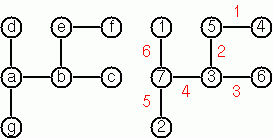

Quoi qu'il en soit, l'énigme est la suivante : Étant donné un arbre avec N nœuds (et donc
N-1 arêtes). Trouvez un moyen d'énumérer les nœuds de 1 à N et,
en conséquence, les arêtes de 1 à N-1 de telle manière que, pour chaque arête K,
la différence de ses numéros de nœuds soit égale à K. La conjecture est que
c'est toujours possible.

Pour les petits arbres, le problème est facile à résoudre à la main. Cependant, pour
les arbres plus grands, et 14 est déjà très grand, il est extrêmement difficile de
trouver une solution. Et rappelez-vous, nous ne savons pas avec certitude s'il y a
toujours une solution !

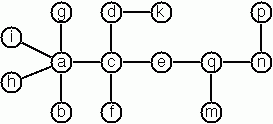

Écrivez une fonction qui calcule un schéma de numérotation pour un arbre donné.
Quelle est la solution pour l'arbre plus grand illustré ici ?
:::

In [ ]:
(* Votre réponse ici *)

:::{solution} ex79
:class: dropdown
:label: sol79

```ocaml
(* exemple en attente *);;
```
:::

:::{exercise} Un Puzzle Arithmétique 🔴
:label: ex80

Étant donné une liste de nombres entiers, trouvez une manière correcte d'insérer
des signes arithmétiques (opérateurs) de sorte que le résultat soit une équation correcte.
Exemple : Avec la liste de nombres `[2; 3; 5; 7; 11]`, nous pouvons former les
équations 2 - 3 + 5 + 7 = 11 ou 2 = (3 * 5 + 7) / 11 (et dix autres !).
:::

In [ ]:
(* Votre réponse ici *)

:::{solution} ex80
:class: dropdown
:label: sol80

```ocaml
(* exemple en attente *);;
```
:::

:::{exercise} Nombres en Toutes Lettres 🟡
:label: ex81

Sur les documents financiers, comme les chèques, les nombres doivent parfois être écrits
en toutes lettres. Exemple : 175 doit être écrit comme un-sept-cinq. Écrivez une
fonction `full_words` pour imprimer les nombres entiers (non négatifs) en toutes
lettres.

```ocaml
# full_words 175;;
- : string = "un-sept-cinq"
```
:::

In [ ]:
(* Votre réponse ici *)

:::{solution} ex81
:class: dropdown
:label: sol81

```ocaml
# let full_words =
    let digit = [|"zéro"; "un"; "deux"; "trois"; "quatre"; "cinq"; "six";
                  "sept"; "huit"; "neuf"|] in
    let rec words w n =
      if n = 0 then (match w with [] -> [digit.(0)] | _ -> w)
      else words (digit.(n mod 10) :: w) (n / 10)
    in
      fun n -> String.concat "-" (words [] n);;
val full_words : int -> string = <fun>
```
:::

:::{exercise} Vérificateur de Syntaxe 🟡
:label: ex82

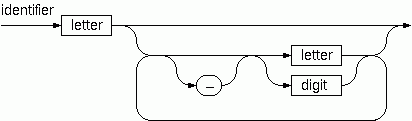

Dans un certain langage de programmation (Ada), les identifiants sont définis par le
diagramme de syntaxe (diagramme ferroviaire) ci-contre. Transformez le diagramme de syntaxe
en un système de diagrammes de syntaxe qui ne contiennent pas de boucles ; c'est-à-dire qui
sont purement récursifs. En utilisant ces diagrammes modifiés, écrivez une fonction
`identifier : string -> bool` qui peut vérifier si une chaîne de caractères donnée
est un identifiant légal.

```ocaml
# identifier "ceci-est-un-long-identifiant";;
- : bool = true
```
:::

In [ ]:
(* Votre réponse ici *)

:::{solution} ex82
:class: dropdown
:label: sol82

```ocaml
# let identifier =
    let is_letter c = 'a' <= c && c <= 'z' in
    let is_letter_or_digit c = is_letter c || ('0' <= c && c <= '9') in
    let rec is_valid s i not_after_dash =
      if i < 0 then not_after_dash
      else if is_letter_or_digit s.[i] then is_valid s (i - 1) true
      else if s.[i] = '-' && not_after_dash then is_valid s (i - 1) false
      else false in
    fun s -> (
        let n = String.length s in
      n > 0 && is_letter s.[n - 1] && is_valid s (n - 2) true);;
val identifier : string -> bool = <fun>
```
:::

:::{exercise} Sudoku 🟡
:label: ex83

Les puzzles de Sudoku se présentent comme suit :

```text
   Énoncé du problème                 Solution

    .  .  4 | 8  .  . | .  1  7      9  3  4 | 8  2  5 | 6  1  7
            |         |                      |         |
    6  7  . | 9  .  . | .  .  .      6  7  2 | 9  1  4 | 8  5  3
            |         |                      |         |
    5  .  8 | .  3  . | .  .  4      5  1  8 | 6  3  7 | 9  2  4
    --------+---------+--------      --------+---------+--------
    3  .  . | 7  4  . | 1  .  .      3  2  5 | 7  4  8 | 1  6  9
            |         |                      |         |
    .  6  9 | .  .  . | 7  8  .      4  6  9 | 1  5  3 | 7  8  2
            |         |                      |         |
    .  .  1 | .  6  9 | .  .  5      7  8  1 | 2  6  9 | 4  3  5
    --------+---------+--------      --------+---------+--------
    1  .  . | .  8  . | 3  .  6      1  9  7 | 5  8  2 | 3  4  6
            |         |                      |         |
    .  .  . | .  .  6 | .  9  1      8  5  3 | 4  7  6 | 2  9  1
            |         |                      |         |
    2  4  . | .  .  1 | 5  .  .      2  4  6 | 3  9  1 | 5  7  8
```

Chaque case du puzzle appartient à une ligne (horizontale) et à une
colonne (verticale), ainsi qu'à un seul carré 3x3 (que nous appellerons "carré" pour faire court).
Au début, certaines des cases contiennent un nombre à un chiffre
entre 1 et 9. Le problème est de remplir les cases manquantes avec des chiffres de
telle manière que chaque nombre entre 1 et 9 apparaisse exactement une fois dans
chaque ligne, dans chaque colonne et dans chaque carré.

```ocaml
# (* La représentation du plateau n'est pas imposée. Ici "0" représente "." *);;
```
:::

In [ ]:
(* Votre réponse ici *)

:::{solution} ex83
:class: dropdown
:label: sol83

```ocaml
# open Printf

  module Board = struct
    type t = int array (* 9×9, représentation par ligne. Une valeur de 0
                          signifie indécis. *)

    let is_valid c = c >= 1

    let get (b : t) (x, y) = b.(x + y * 9)

    let get_as_string (b : t) pos =
      let i = get b pos in
      if is_valid i then string_of_int i else "."

    let with_val (b : t) (x, y) v =
      let b = Array.copy b in
      b.(x + y * 9) <- v;
      b

    let of_list l : t =
      let b = Array.make 81 0 in
      List.iteri (fun y r -> List.iteri (fun x e ->
        b.(x + y * 9) <- if e >= 0 && e <= 9 then e else 0) r) l;
      b

    let print b =
      for y = 0 to 8 do
        for x = 0 to 8 do
          printf (if x = 0 then "%s" else if x mod 3 = 0 then " | %s"
                  else "  %s")  (get_as_string b (x, y))
        done;
        if y < 8 then
          if y mod 3 = 2 then printf "\n--------+---------+--------\n"
          else printf "\n        |         |        \n"
        else printf "\n"
      done

    let available b (x, y) =
      let avail = Array.make 10 true in
      for i = 0 to 8 do
        avail.(get b (x, i)) <- false;
        avail.(get b (i, y)) <- false;
      done;
      let sq_x = x - x mod 3 and sq_y = y - y mod 3 in
      for x = sq_x to sq_x + 2 do
        for y = sq_y to sq_y + 2 do
          avail.(get b (x, y)) <- false;
        done;
      done;
      let av = ref [] in
      for i = 1 (* pas 0 *) to 9 do if avail.(i) then av := i :: !av done;
      !av

    let next (x,y) = if x < 8 then (x + 1, y) else (0, y + 1)

    (** Essayer de remplir les entrées indécises. *)
    let rec fill b ((x, y) as pos) =
      if y > 8 then Some b (* toutes les entrées sont remplies *)
      else if is_valid(get b pos) then fill b (next pos)
      else match available b pos with
           | [] -> None (* pas de solution *)
           | l -> try_values b pos l
    and try_values b pos = function
      | v :: l ->
         (match fill (with_val b pos v) (next pos) with
          | Some _ as res -> res
          | None -> try_values b pos l)
      | [] -> None
  end

  let sudoku b = match Board.fill b (0, 0) with
    | Some b -> b
    | None -> failwith "sudoku : pas de solution";;
module Board :
  sig
    type t = int array
    val is_valid : int -> bool
    val get : t -> int * int -> int
    val get_as_string : t -> int * int -> string
    val with_val : t -> int * int -> int -> int array
    val of_list : int list list -> t
    val print : t -> unit
    val available : t -> int * int -> int list
    val next : int * int -> int * int
    val fill : t -> int * int -> t option
    val try_values : t -> int * int -> int list -> t option
  end
val sudoku : Board.t -> Board.t = <fun>
```
:::

:::{exercise} Nonogrammes 🔴
:label: ex84

Vers 1994, un certain type de puzzles était très populaire en Angleterre. Le
journal "Sunday Telegraph" écrivait : "Les nonogrammes sont des puzzles du Japon
et sont actuellement publiés chaque semaine uniquement dans The Sunday Telegraph.
Utilisez simplement votre logique et votre habileté pour compléter la grille et révéler une
image ou un diagramme." En tant que programmeur OCaml, vous êtes dans une meilleure
situation : vous pouvez laisser votre ordinateur faire le travail !

Le puzzle se présente comme suit : Essentiellement, chaque ligne et colonne d'un
bitmap rectangulaire est annotée avec les longueurs respectives de ses
chaînes distinctes de cellules occupées. La personne qui résout le puzzle
doit compléter le bitmap en ne disposant que de ces longueurs.

```text
          Énoncé du problème :          Solution :

          |_|_|_|_|_|_|_|_| 3         |_|X|X|X|_|_|_|_| 3
          |_|_|_|_|_|_|_|_| 2 1       |X|X|_|X|_|_|_|_| 2 1
          |_|_|_|_|_|_|_|_| 3 2       |_|X|X|X|_|_|X|X| 3 2
          |_|_|_|_|_|_|_|_| 2 2       |_|_|X|X|_|_|X|X| 2 2
          |_|_|_|_|_|_|_|_| 6         |_|_|X|X|X|X|X|X| 6
          |_|_|_|_|_|_|_|_| 1 5       |X|_|X|X|X|X|X|_| 1 5
          |_|_|_|_|_|_|_|_| 6         |X|X|X|X|X|X|_|_| 6
          |_|_|_|_|_|_|_|_| 1         |_|_|_|_|X|_|_|_| 1
          |_|_|_|_|_|_|_|_| 2         |_|_|_|X|X|_|_|_| 2
           1 3 1 7 5 3 4 3             1 3 1 7 5 3 4 3
           2 1 5 1                     2 1 5 1
```

Pour l'exemple ci-dessus, le problème peut être énoncé comme les deux listes
`[[3]; [2; 1]; [3; 2]; [2; 2]; [6]; [1; 5]; [6]; [1]; [2]]` et
`[[1; 2]; [3; 1]; [1; 5]; [7; 1]; [5]; [3]; [4]; [3]]` qui donnent les longueurs "solides"
des lignes et des colonnes, de haut en bas et de gauche à droite,
respectivement. Les puzzles publiés sont plus grands que cet exemple, par exemple
25×20, et ont apparemment toujours des solutions uniques.

<!-- $MDX skip -->
```ocaml
# solve [[3]; [2; 1]; [3; 2]; [2; 2]; [6]; [1; 5]; [6]; [1]; [2]]
      [[1; 2]; [3; 1]; [1; 5]; [7; 1]; [5]; [3]; [4]; [3]];;
```
:::

In [ ]:
(* Votre réponse ici *)

:::{solution} ex84
:class: dropdown
:label: sol84

```ocaml
# type element = Empty | X (* assurez-vous que nous ne manquons aucun cas dans les motifs *);;
type element = Empty | X
```
:::

:::{exercise} Mots Croisés 🔴
:label: ex85

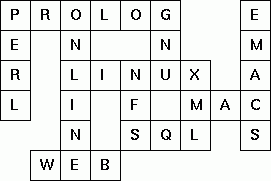

Étant donné une grille vide (ou presque vide) de mots croisés et un
ensemble de mots. Le problème est de placer les mots dans la grille.

Le puzzle de mots croisés particulier est spécifié dans un fichier texte qui liste d'abord
les mots (un mot par ligne) dans un ordre arbitraire. Ensuite, après
une ligne vide, la grille de mots croisés est définie. Dans cette spécification de grille,
un emplacement de caractère vide est représenté par un point (.).
Afin de faciliter la solution, les emplacements de caractères peuvent également
contenir des valeurs de caractères prédéfinies. Le puzzle ci-dessus est défini dans le
fichier
[p7_09a.dat](https://sites.google.com/site/prologsite/prolog-problems/7/solutions-7/p7_09a.dat?attredirects=0&d=1),
d'autres exemples sont
[p7_09b.dat](https://sites.google.com/site/prologsite/prolog-problems/7/solutions-7/p7_09b.dat?attredirects=0&d=1)
et
[p7_09d.dat](https://sites.google.com/site/prologsite/prolog-problems/7/solutions-7/p7_09d.dat?attredirects=0&d=1).
Il y a aussi un exemple de puzzle
([p7_09c.dat](https://sites.google.com/site/prologsite/prolog-problems/7/solutions-7/p7_09c.dat?attredirects=0&d=1))
qui n'a pas de solution.

Les mots sont des chaînes de caractères (listes de caractères) d'au moins deux caractères. Une
séquence horizontale ou verticale d'emplacements de caractères dans la grille
de mots croisés est appelée un site. Notre problème est de trouver une
manière compatible de placer des mots sur les sites.

**Indices :**

1. Le problème n'est pas facile. Vous aurez besoin de temps pour le
 comprendre en profondeur. Alors, n'abandonnez pas trop tôt ! Et rappelez-vous que l'
 objectif est une solution propre, pas seulement un bricolage rapide et sale !
1. Pour des raisons d'efficacité, il est important, au moins pour les plus grands puzzles,
 de trier les mots et les sites dans un ordre particulier.
:::

In [ ]:
(* Votre réponse ici *)

:::{solution} ex85
:class: dropdown
:label: sol85

```ocaml
(* exemple en attente *);;
```
:::

:::{exercise} Séquences Infinies 🟢
:label: ex86

**Tags:** `seq`

Les listes sont finies, ce qui signifie qu'elles contiennent toujours un nombre fini d'éléments. Les séquences peuvent
être finies ou infinies.

Le but de cet exercice est de définir un type `'a stream` qui ne contient que des
séquences infinies. En utilisant ce type, définissez les fonctions suivantes :
```ocaml
val hd : 'a stream -> 'a
(** Retourne le premier élément d'un flux *)
val tl : 'a stream -> 'a stream
(** Supprime le premier élément d'un flux *)
val take : int -> 'a stream -> 'a list
(** [take n seq] retourne les n premières valeurs de [seq] *)
val unfold : ('a -> 'b * 'a) -> 'a -> 'b stream
(** Similaire à Seq.unfold *)
val bang : 'a -> 'a stream
(** [bang x] produit une séquence infinie de valeurs [x] répétées. *)
val ints : int -> int stream
(* Similaire à Seq.ints *)
val map : ('a -> 'b) -> 'a stream -> 'b stream
(** Similaire à List.map et Seq.map *)
val filter: ('a -> bool) -> 'a stream -> 'a stream
(** Similaire à List.filter et Seq.filter *)
val iter : ('a -> unit) -> 'a stream -> 'b
(** Similaire à List.iter et Seq.iter *)
val to_seq : 'a stream -> 'a Seq.t
(** Traduit un ['a stream] en un ['a Seq.t] *)
val of_seq : 'a Seq.t -> 'a stream
(** Traduit un ['a Seq.t] en un ['a stream]
    @raise Failure si la séquence d'entrée est finie. *)
```
**Astuce :** Utilisez les motifs `let ... =`.
:::

In [ ]:
(* Votre réponse ici *)

:::{solution} ex86
:class: dropdown
:label: sol86

```ocaml
type 'a cons = Cons of 'a * 'a stream
and 'a stream = unit -> 'a cons

let hd (seq : 'a stream) = let (Cons (x, _)) = seq () in x
let tl (seq : 'a stream) = let (Cons (_, seq)) = seq () in seq
let rec take n seq = if n = 0 then [] else let (Cons (x, seq)) = seq () in x :: take (n - 1) seq
let rec unfold f x () = let (y, x) = f x in Cons (y, unfold f x)
let bang x = unfold (fun x -> (x, x)) x
let ints x = unfold (fun x -> (x, x + 1)) x
let rec map f seq () = let (Cons (x, seq)) = seq () in Cons (f x, map f seq)
let rec filter p seq () = let (Cons (x, seq)) = seq () in let seq = filter p seq in if p x then Cons (x, seq) else seq ()
let rec iter f seq = let (Cons (x, seq)) = seq () in f x; iter f seq
let to_seq seq = Seq.unfold (fun seq -> Some (hd seq, tl seq)) seq
let rec of_seq seq () = match seq () with
| Seq.Nil -> failwith "Pas une séquence infinie"
| Seq.Cons (x, seq) -> Cons (x, of_seq seq)
```
:::

:::{exercise} Diagonale d'une Séquence de Séquences 🟡
:label: ex87

**Tags:** `seq`

Écrivez une fonction `diag : 'a Seq.t Seq.t -> 'a Seq` qui retourne la _diagonale_
d'une séquence de séquences. La séquence retournée est formée comme suit :
Le premier élément de la séquence retournée est le premier élément de la première
séquence ; le deuxième élément de la séquence retournée est le deuxième élément de
la deuxième séquence ; le troisième élément de la séquence retournée est le troisième
élément de la troisième séquence ; et ainsi de suite.
:::

In [ ]:
(* Votre réponse ici *)

:::{solution} ex87
:class: dropdown
:label: sol87

```ocaml
let rec diag seq_seq () =
    let hds, tls = Seq.filter_map Seq.uncons seq_seq |> Seq.split in
    let hd, tl = Seq.uncons hds |> Option.map fst, Seq.uncons tls |> Option.map snd in
    let d = Option.fold ~none:Seq.empty ~some:diag tl in
    Option.fold ~none:Fun.id ~some:Seq.cons hd d ()
```
:::